# Notebook da Metodologia Proposta no Artigo

## Index

[Descricao da Proposta](#scrollTo=48alzOyxX5r4)

[Tabela de Parametros do AG](#scrollTo=Lwf6zWRJd2Oh)

[O individuo (cromossomo)](#scrollTo=48alzOyxX5r4)

[Conversão do cromossomo para pesos](#scrollTo=MOfdY4DNmb5Q)

[Por que usar a TRI?](#scrollTo=BOPOVxy3nW4E)

[Estimação dos parametros da TRI no AG](#scrollTo=_mSQU-KupBIU)

[Calculo do Fitness](#scrollTo=RnwyXeboVVCj)

[Mutacao adaptativa pela TRI](#scrollTo=SEpnJ299Wrzg)

[Avaliação do desempenho do AutoML com AG e TR](#scrollTo=-WpDUcmFX9a6)

[Sobre o dataset escolhido](#scrollTo=F-J9LGiGZq2B)

[Importa as bibliotecas necessarias](#scrollTo=CEok_4FF1JBd)

[Algoritmo Genetico](#scrollTo=rx0sTJh6__6Y)

- [Funções gerais do AG](#scrollTo=N5xS_Il919a4)
- [Experimento com o dataset Banknote](#scrollTo=NHllNVq3Z2GO)
- [Grafico de Convergencia do AG](#scrollTo=85DzUaK5tVVb)
- [Tabela Final com o Fitness encontrado para cada população](#scrollTo=JwX2p8WJhg5P)

[Teste comparacao do modelo Final encontrado pelo AG com um modelo treinado normalmente](#scrollTo=O8284lXNhplR)

[Teste com o AutoKeras](#scrollTo=hhtto2xHbRKE)

[Consideraçoes Finais](#scrollTo=_fVaOzi8mAdH)

# Descricao da Proposta

Resumidamente, objetivo é utilizar a capacidade evolucionária dos algoritmos genéticos para criar um algoritmo de AutoML, onde os indivíduos serão modelos de Redes Neurais sendo os genes os pesos da rede. A avaliação dos individuos será feita via o cálculo e conceitos da [Teoria de Resposta ao Item](https://pt.wikipedia.org/wiki/Teoria_de_resposta_ao_item), além disso os resultados da TRI também são utilizados para realizar a mutação adaptativa.

# Tabela de Parametros do AG

|           Parâmetro           |                    Descrição                   |
|:-----------------------------:|:----------------------------------------------:|
|         Representação         | Cada gene do cromossomo é um número tipo float |
|           Cruzamento          |         Cruzamento aritmético com corte        |
| Probabilidade de Recombinação |                      80%                      |
|            Mutação            |                Mutação Gaussiana               |
|    Probabilidade de Mutação   |       Mutação adaptativa pela TRI com queda exponencial      |
|        Seleção de Pais        |                     Torneio                    |
|    Seleção de Sobreviventes   |               Ficam só os filhos               |
|       Número de gerações      |               Não foi determinado              |
|      Tamanho da população     |                  20, 30 e 50                  |
|         Inicialização         |                    Aleatória                   |
|       Critério de Parada      |              Parada por estagnação ou caso atinja um valor máximo esperado             |
| Fitness | O Fitness é calculado segundo os parametros de item e habilidade dos modelos |

# O individuo (cromossomo)

Os indivíduos serão uma lista de pesos que compôe a Rede Neural. Todas as redes serão simples com apenas 3 camadas. A quantidade de neurônios na rede são definidos de acordo com o dataset que se deseja classificar. A imagem abaixo representa um exemplo de um indivíduo.

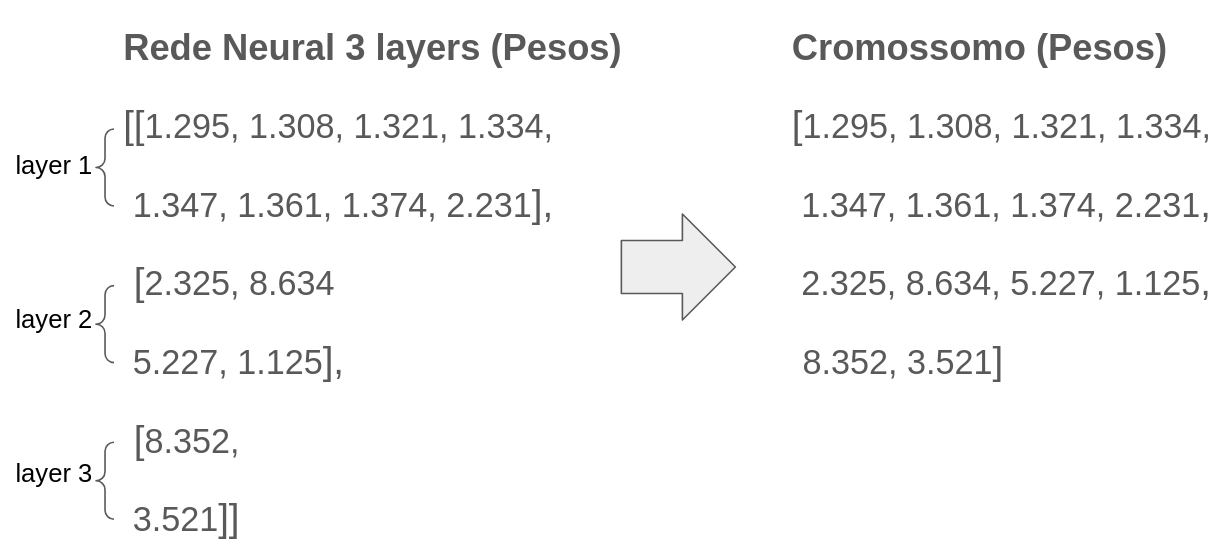

# Conversão do cromossomo para pesos

Dentro do algoritmo genético todos os genes são valores gerados entre 0 e 1. Para utilizar esses valores como pesos de uma Rede Neural, são calculados limites superior e inferior de cada camada da NN utilizando a inicialização de Xavier.

# Por que usar a TRI?

A TRI é um conjunto de modelos matemáticos que servem para calcular a proficiencia de um indíviduo por meio de um teste. A TRI foi desenvolvida para ser capaz de avaliar o desemepenho de um indivíduo diretamente sobre um item e não sobre todo o teste como comumente é feito na Teoria Clássica dos Testes. Semelhantemente, o mesmo ocorre em ML onde as metricas classicas de avaliação medem o desempenho somente de forma geral (sobre todo o conjunto de teste), usar a TRI permite explorar a performance de um modelo de forma local servindo como uma lupa capaz de complementar as métricas clássicas.

# Estimação dos parâmetros da TRI no AG

Antes da execucao do AG, prepara-se o dataset que será classificado. O datset então é dividido em dados de treino e teste, de forma que somente os dados de treino são utilizados no AG. Por definição, sempre utiliza-se o número fixo de 3 camadas para as Redes Neurais, enquanto o número de nós é calculado com base no numero de features do dataset.

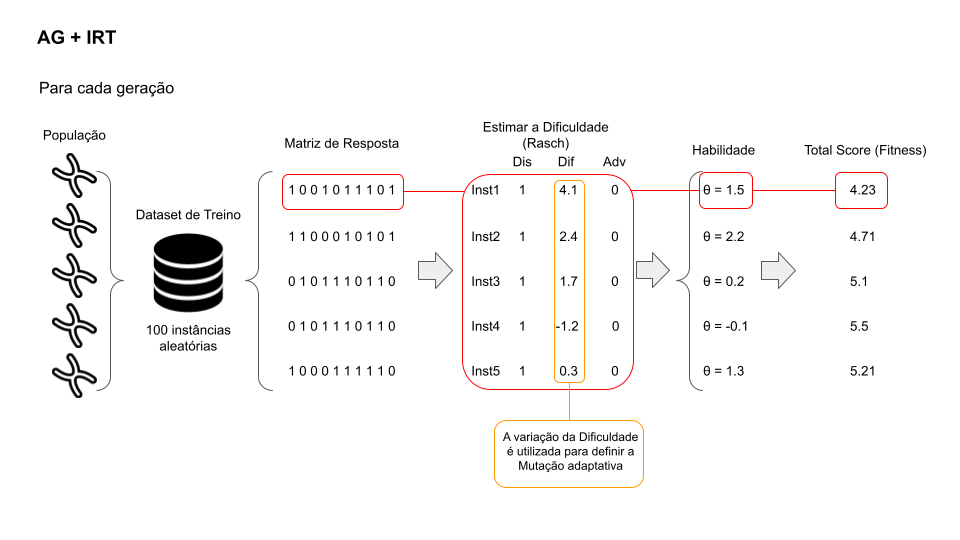

# Cálculo do Fitness

Uma vez que os parâmetros de item e a habilidade do modelo foi estimada, pode-se calcular a probabilidade de acerto para cada instância de treino e então obter o Score total que é a soma da probabilidade de acerto sempre que o modelo acertar e a subtração da probabilidade de erro sempre que o modelo errar. Dessa forma, busca-se tornar mais evidente a separacao de modelos mais habilidosos dos menos habilidosos. E assim, não classificar o individuo somente pela quantidade de acertos (Acurácia), mas também pela qualidade dos acertos (TRI).

# Mutação adaptativa pela TRI

Como a TRI tem a característica de olhar tanto para os itens quanto para os indivíduos, podemos usar os parâmetros de item gerados para entender como está o desempenho total da população de indivíduos utilizada. Para isso, a cada geração é calculado a media da dificuldade normalizada entre 0 e 4, então verifica-se se essa media aumentou ou diminuiu. Caso tenha aumentado, então incrementa-se a probabilidade de mutação e o sigma, caso contrário continua o decaimento exponencial.

# Avaliação do desempenho do AutoML com AG e TRI

Para avaliar se o conjunto de pesos que definem um modelo de Rede Neural encontrado pelo AG é aceitável, é gerado um novo modelo de Rede Neural com os pesos encontrados pelo AG e sem treinamento testa-se a rede com o dataset de teste que foi separado antes de executar o AG. O resultado obtido é comparado com o uma Rede neural treinada normalmente e com a Rede Neural encontrada pelo Autokeras para o dataset em questão.

# Sobre o dataset escolhido

Foi escolhido o dataset [Banknote-Atuthentication](https://www.openml.org/search?type=data&sort=runs&id=1462&status=active) para servir de estudo de caso. O banknote foi escolhido por se tratar de um dataset mais simples com somente 4 features e que serve para testar a metodologia proposta.

# Importa as bibliocas necessarias

In [ ]:
!pip install catsim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 2.6 MB/s 


In [ ]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import copy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import time
import rpy2
import sys
import openml
import warnings
warnings.filterwarnings("ignore")
#!wget https://raw.githubusercontent.com/LucasFerraroCardoso/IRT_OpenML/master/decodIRT_MLtIRT.py
#import decodIRT_MLtIRT as MLtIRT

In [ ]:
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
from rpy2.robjects.vectors import StrVector
from rpy2.robjects import pandas2ri

utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

#Lista de pacotes R para instalar
#O pacote ltm é usado para o calculo dos parametros do IRT
packnames = ('ltm','ltm')

#Verifica se o pacote ja esta instalado, caso não, instala
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    print('Instalando o pacote ltm do R\n')
    utils.install_packages(StrVector(names_to_install))

#Importa o pacore ltm do R
ltm = rpackages.importr('ltm')
pandas2ri.activate()

# Algoritmo Genetico 

## Funções Gerais do AG

In [ ]:
def normalNN(epoch,X_train, y_train,X_test, y_test,l1,l2,l3):

  gnn = GNN(l1=l1,l2=l2,l3=l3)
  gnn.compile_train(epoch,X_train, y_train)
  fitness,_ = gnn.forward_propagation(X_test, y_test)
  return fitness

def testa_gnn(cromossomo,l1,l2,l3,X_test,y_test):

  weights = GNN(l1=l1,l2=l2,l3=l3).returnWeights()
  weights = deconvertPesos(cromossomo,weights)
  gnn = GNN(child_weights=weights,l1=l1,l2=l2,l3=l3)
  fitness,_ = gnn.forward_propagation(X_test, y_test)
  return fitness

def calcIRT(respMatrix):

  import rpy2.robjects.packages as rpackages
  import rpy2.robjects as robjects
  from rpy2.robjects import pandas2ri
  from rpy2.rinterface import RRuntimeWarning
  warnings.filterwarnings("ignore", category=RRuntimeWarning)

  #Importa o pacore ltm do R
  ltm = rpackages.importr('ltm')
  pandas2ri.activate()
  #data = ltm.tpm(respMatrix,type = "rasch",IRT_param = True)
  try:
    data = ltm.rasch(respMatrix, Hessian = True, start_val = 'random')
  except:
    print(respMatrix)

  par = str(data).split('\n')

  key = 0
  count = 0
  lista = []
  for c,i in enumerate(par):
    if i == 'Coefficients:':
      key = 1
    if key == 1:
      if par[c].split() == []:
        break
      if 'Dffclt.V' in par[c].split()[0]:
        for p in par[c+1].split():
          lista.append(p)

  item_param = {}
  for i in range(len(lista)-1):
    item_param['V'+str(i)] = {'Discriminacao':1,'Dificuldade':float(lista[i]),'Adivinhacao':0}

  dataframe = pd.DataFrame.from_dict(item_param)
  dataframe = dataframe.reindex(index = ['Discriminacao','Dificuldade','Adivinhacao'])

  return dataframe.transpose()

def compare(original, res):
  res=np.transpose(res)[0]    
  res = list(map(lambda x: 0 if x<0.5 else 1, res))
  tmp = []
  for i,value in enumerate(original):
    if value == res[i]:
      tmp.append(1)
    else:
      tmp.append(0)
  return tmp

def convertPesos(weights):
  cromossomo = []
  for layer in weights:
    for w in layer:
      for n in w:
        cromossomo.append(n)
  return cromossomo

def deconvertPesos(cromossomo,weights):
  layers = [i.shape for i in weights]
  weights = []
  for l in layers:
    h = l[0]*l[1]
    a = np.array(cromossomo[:h], dtype=np.float32).reshape(l)
    cromossomo = cromossomo[h:]
    weights.append(a)
  return weights

def xavierWeight(n):
  from math import sqrt
  lower, upper = -(1.0 / sqrt(n)), (1.0 / sqrt(n))
  return [lower,upper]

def calcLimites(weights):
  layers = [i.shape for i in weights]
  ls = [i[0]*i[1] for i in layers]
  cromossomo = convertPesos(weights)
  n_gene = len(cromossomo)
  limites = {}
  for i in range(n_gene):
    if i < ls[0]:
      limites[i] = xavierWeight(ls[0])
    if i >= ls[0] and i < ls[0]+ls[1]:
      limites[i] = xavierWeight(ls[1])
    elif i >= ls[0]+ls[1]:
      limites[i] = xavierWeight(ls[2])
  
  return n_gene, limites


def fitFunction(cromossomo, X_train, y_train, layers):
  tmp_gnn = GNN(l1=layers[0],l2=layers[1],l3=layers[2])
  weights = tmp_gnn.returnWeights()
  weights = deconvertPesos(cromossomo,weights)
  tmp_gnn = GNN(weights,l1=layers[0],l2=layers[1],l3=layers[2])
  fitness,resp = tmp_gnn.forward_propagation(X_train, y_train)
  return fitness,resp

def getResp(cromossomo, X_train, y_train, layers):
  tmp_gnn = GNN(l1=layers[0],l2=layers[1],l3=layers[2])
  weights = tmp_gnn.returnWeights()
  weights = deconvertPesos(cromossomo,weights)
  tmp_gnn = GNN(weights)
  fitness = tmp_gnn.forward_propagation(X_train, y_train)
  return fitness

class GNN(Sequential):
  # Construtor
  def __init__(self, child_weights=None, l1=4, l2=2, l3=1):
      # Inicializa Sequential Model Super Class
      super().__init__()
      # Se nenhum peso foi passado, gera-se os pesos aleatoriamente
      if child_weights is None:
          # As camadas sao criadas e geradas aleatoriamente
          layer1 = Dense(l1, input_shape=(l1,), activation='sigmoid')
          layer2 = Dense(l2, activation='sigmoid')
          layer3 = Dense(l3, activation='sigmoid')
          # Camadas sao adicionadas ao modelo
          self.add(layer1)
          self.add(layer2)
          self.add(layer3)
      # Se os pesos forem providenciados, entao adiciona-os nas camadas
      else:
          # Seta os pesos nas camadas
          self.add(
              Dense(
                  l1,
                  input_shape=(l1,),
                  activation='sigmoid',
                  weights=[child_weights[0], np.zeros(l1)])
              )
          self.add(
              Dense(
                l2,
                activation='sigmoid',
                weights=[child_weights[1], np.zeros(l2)])
          )
          self.add(
              Dense(
                l3,
                activation='sigmoid',
                weights=[child_weights[2], np.zeros(l3)])
          )
      #Define

  # Funcao de forward propagation
  def forward_propagation(self, X_train, y_train):
      # Forward propagation
      y_hat = self.predict(X_train)
      # Calcula o fitness
      self.fitness = accuracy_score(y_train, y_hat.round())
      return self.fitness, y_hat

  # Backpropagation
  def compile_train(self, epochs, X_train, y_train):
      self.compile(
                    optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy']
                    )
      self.fit(X_train, y_train, epochs=epochs)
  
  def returnWeights(self):
    weights = []
    for layer in self.layers:
      weights.append(layer.get_weights()[0])
    return weights

class individuo():
  def __init__(self,n_gene=None, limites=None):
    self.n_gene = n_gene
    self.limites = limites
    if self.n_gene == None:
      self.cromossomo = None
    else:
      self.cromossomo = self.geraInd()
    self.fitness = None
    self.resp = []

  def getInd(self):
    return self.cromossomo
  
  def getFitness(self):
    return self.fitness

  def geraInd(self):
    tmp = np.random.uniform(0,1,self.n_gene)
    return [p for p in tmp]
  
  def calcResp(self,fitFunction,X_train=None,y_train=None,layers=None):
    cromo_decode = self.decodeInd()
    self.fitness,self.resp = fitFunction(cromo_decode,X_train,y_train,layers)
    self.resp = compare(y_train, self.resp)
  
  def calcFitness(self,fitFunction,palavraAlvo=None,X_train=None,y_train=None,layers=None, irt=[]):
    cromo_decode = self.decodeInd()
    if len(irt) != 0:
      self.fitness = fitFunction(self.resp,irt,self.fitness)
    elif palavraAlvo != None:
      self.fitness = fitFunction(cromo_decode,palavraAlvo)
    elif type(X_train) != type(None) and type(y_train) != type(None):
      self.fitness = fitFunction(cromo_decode,X_train,y_train,layers)
    else:
      self.fitness = fitFunction(cromo_decode)
  
  def ConvertXiValue(self,X,limite):
    LB,UB = limite[0],limite[1]
    return LB + (UB-LB)*X
  
  def DeconvertXiValue(self,value,limite):
    LB,UB = limite[0],limite[1]
    return (value-LB)/(UB-LB)
  
  def decodeInd(self):
    tmp = []
    for c,gene in enumerate(self.cromossomo):
      tmp.append(self.ConvertXiValue(gene,self.limites[c]))
    return tmp[:]

  def encodeInd(self):
    tmp = []
    for c,gene in enumerate(self.cromossomo):
      tmp.append(self.DeconvertXiValue(gene,self.limites[c]))
    return tmp[:]
  
  def mutacaoGauss(self,sigma,probMut):
    for gene in range(self.n_gene):
      if np.random.random() < probMut:
        gene_i = sigma * np.random.randn(1, 1) + self.cromossomo[gene]
        self.cromossomo[gene] = gene_i[0][0]

  # Funcao para mutacao dos pesos
  def mutation(child_weights):
      # Add chance de mutacao aletoria
      selection = random.randint(0, len(child_weights)-1)
      mut = random.uniform(0, 1)
      if mut >= .5:
          child_weights[selection] *= random.randint(2, 5)
      else:
          # Sem mutacao
          pass
  
  def __str__(self):
    return "fit:"+str(self.fitness)+" Genes:"+"".join(["{0:.3f} ".format(gene) for gene in self.cromossomo])

  def __eq__(self, other):
    return (self.fitness == other.fitness)

  def __lt__(self, other):
    return (self.fitness < other.fitness)

  def __gt__(self, other):
    return (self.fitness > other.fitness)


class populacao():
  def __init__(self,n_pop,n_gene,limites):
    self.n_pop = n_pop
    self.n_gene = n_gene
    self.limites = limites
    self.pop = []
    self.respMatrix = []

  def appendPop(self,indi):
    self.pop.append(indi)
  
  def geraPop(self):
    self.pop = [individuo(self.n_gene,self.limites) for i in range(self.n_pop)]

  def decodePop(self):
    tmp = []
    for i in range(self.n_pop):
      tmp.append(self.pop[i].decodeInd())
    return tmp
  
  def encodePop(self):
    tmp = []
    for i in range(self.n_pop):
      tmp.append(self.pop[i].encodeInd())
    return tmp
  
  def calcPopFitness(self, fitFunction,palavraAlvo = None, X_train=None,y_train=None,layers=None,irt=[]):
    for i in range(self.n_pop):
      self.pop[i].calcFitness(fitFunction,palavraAlvo,X_train,y_train,layers,irt)

  def calcPopResp(self, fitFunction, X_train=None,y_train=None,layers=None):
    self.respMatrix = []
    X_t, _, y_t, _ = train_test_split(X_train, y_train,stratify=y_train,shuffle=True,train_size=100)
    for i in range(self.n_pop):
      self.pop[i].calcResp(fitFunction,X_t,y_t,layers)
      self.respMatrix.append(self.pop[i].resp)
  
  def calcIRT(self):
    tmp = {}
    for i in range(len(self.respMatrix)):
      tmp['Model '+str(i)] = self.respMatrix[i]
    #print(tmp)
    df = pd.DataFrame.from_dict(tmp,orient='index',columns=['V'+str(i) for i in range(len(self.respMatrix[0]))])
    #df.to_csv('tmp.csv')
    #time.sleep(1)
    irt_param = calcIRT(df).to_numpy()
    col = np.ones((len(irt_param), 1))
    self.irt_param = np.append(irt_param, col, axis = 1)
    return self.irt_param
    
  
  def sortPop(self,reverse=True):
    tmp = [(i.fitness,i.cromossomo,i) for i in self.pop]
    tmp.sort(key=lambda x: x[0],reverse=reverse)
    tmp_pop = [i[2] for i in tmp]
    self.pop = tmp_pop
  
  def mutaPop(self,sigma,probMut):
    for indi in self.pop:
      indi.mutacaoGauss(sigma,probMut)
  
  def printPop(self):
    for i in self.pop:
      print(i)

class GA():
  def __init__(self,n_pop,n_gene,limites):
    self.n_pop = n_pop
    self.n_gene = n_gene
    self.limites = limites
    if n_pop <= 10:
      self.Ring = 2
    else:
      self.Ring = int(n_pop*0.2)
    self.geracao = 0
    self.best = None
    self.fitHist = []
    self.allTime_best = None
    self.pop = []
    self.irtHist = []
    self.irtHist_dif = []
    self.mut_values = []
  
  def torneio(self,pop,reverse=True):
    ring = []
    pop_tmp = pop.copy()
    for _ in range(self.Ring):
      indi = random.choice(pop_tmp)
      #while(indi in ring):
      #  indi = random.choice(self.pop)
      ring.append(indi)
      pop_tmp.remove(indi)

      ring.sort(key=lambda x: x.fitness, reverse=reverse)

    return copy.deepcopy(ring[-1])
  
  def crossAritmetico(self, pai1, pai2, pc):
    """Realiza crossover aritmetico em todos os genes do cromossomo"""
    beta = np.random.random()
    #print(beta)
    #print(pai1.cromossomo)
    novogene1 = beta * np.array(pai1.cromossomo) + (1 - beta) * np.array(pai2.cromossomo)
    novogene2 = (1 - beta) * np.array(pai1.cromossomo) + beta * np.array(pai2.cromossomo)
    novocromo1 = individuo()
    novocromo2 = individuo()
    novocromo1.cromossomo = [i for i in novogene1]
    novocromo2.cromossomo = [i for i in novogene2]
    return novocromo1, novocromo2
  
  def crossAritmeticoCorte(self, pai1, pai2, pc):
    """Realiza crossover aritmetico em todos os genes do cromossomo"""
    beta = np.random.random()
    corte = np.random.randint(self.n_gene)
    if np.random.random() < pc:
    
      novogene1 = np.concatenate( ( np.array(pai1.cromossomo[:corte]) , beta * np.array(pai1.cromossomo[corte:])   + (1 - beta) * np.array(pai2.cromossomo[corte:])))
      novogene2 = np.concatenate( ( np.array(pai2.cromossomo[:corte]) , beta * np.array(pai2.cromossomo[corte:])   + (1 - beta) * np.array(pai1.cromossomo[corte:])))
      novocromo1 = individuo(self.n_gene,self.limites)
      novocromo2 = individuo(self.n_gene,self.limites)
      novocromo1.cromossomo = [i for i in novogene1]
      novocromo2.cromossomo = [i for i in novogene2]
      return novocromo1, novocromo2

    else:
      return pai1,pai2
  
  def decreaseRate(self,value,rate,tempo):
    return value*(1 - rate)**tempo
  
  def increaseRate(self,value,rate,tempo):
    return value*(1 + rate)**tempo
  
  def condParada(self,anterior,atual):
    return abs(anterior-atual)/atual
  
  def countGeracao(self):
    self.geracao += 1
  
  def appendHistFit(self,pop):
    fit = [i.fitness for i in pop]
    return fit
  
  def tabelaFinal(self,pop,n_ind):
    tmp_dict = {}
    for i in range(n_ind):
      tmp = {}
      tmp['fitness'] = pop[-1-i].fitness
      genes = pop[-1-i].decodeInd()
      for c,gene in enumerate(genes):
        tmp['X'+str(c+1)] = gene
      
      tmp_dict[i] = tmp
    return tmp_dict
  
  def fitFunctionIRT(self,resp,irt_param,e_theta):
    from catsim.estimation import NumericalSearchEstimator
    from catsim.irt import icc_hpc

    adm_items = [i for i in range(len(irt_param))]
    
    item_resp = [True if i == 1 else False for i in resp]
    
    theta = NumericalSearchEstimator().estimate(items=irt_param, 
                                                administered_items= adm_items, 
                                                response_vector=item_resp,
                                                est_theta=e_theta)
    
    list_prob = list(icc_hpc(theta,irt_param))
    soma = 0
    for i,inst in enumerate(resp):
      if inst == 1:
        soma += list_prob[i]
      else:
        soma += (1- list_prob[i])*-1

    return soma

  def normalize(self,x,between):
    a,b = between
    tmp = []
    for i in x:
      v = (b-a)*(i - min(x)) / (max(x) - min(x)) + a
      tmp.append(v)
    return tmp

  def check_irt(self,irt_old,irt_new):
    l = self.normalize([b[1] for b in irt_old],(0,4))
    media1 = np.mean(l)
    l = self.normalize([b[1] for b in irt_new],(0,4))
    media2 = np.mean(l)
    
    if media1 >= media2:
      return False
    else:
      return True

  def run(self,fitFunction,sigma,probMut,pc,delta,max_iter,best_value,decreaseRate,palavraAlvo=None,X_train=None,y_train=None,layers=None,reverse=True,irt=True):
    self.sigma = sigma
    self.probMut = probMut
    
    print("Cria a populacao")
    self.pop = populacao(self.n_pop,self.n_gene,self.limites)
    self.pop.geraPop()
    self.pop.printPop()
    if irt:
      self.pop.calcPopResp(fitFunction,X_train, y_train,layers)
      self.pop.calcIRT()
      print(self.pop.irt_param)
      self.pop.calcPopFitness(self.fitFunctionIRT,palavraAlvo,X_train, y_train,layers,self.pop.irt_param)
      self.irtHist.append(self.pop.irt_param)
      irt_aux_tmp = [ii[1] for ii in self.pop.irt_param]
      self.irtHist_dif.append(irt_aux_tmp[:])
    else:
      self.pop.calcPopFitness(fitFunction,palavraAlvo,X_train, y_train,layers)
    self.pop.printPop()
    self.pop.sortPop(reverse)
    self.pop.printPop()

    self.best = self.pop.pop[-1]
    self.allTime_best = self.best
    count_stagnation = 0
    count_increase = 0

    while count_stagnation < max_iter or self.best.fitness < best_value:  
      print(self.geracao)
      self.countGeracao()

      pop_tmp = populacao(self.n_pop,self.n_gene,self.limites)
      for i in range(0,self.n_pop):
        #print("torneio. seleciona pais")

        pai1 = self.torneio(self.pop.pop,reverse)
        pai2 = self.torneio(self.pop.pop,reverse)
        #print(pai1,pai2)

        filho1,filho2 = self.crossAritmeticoCorte(pai1,pai2,pc)
        pop_tmp.appendPop(filho1)

      self.pop.pop = pop_tmp.pop.copy()

      self.pop.mutaPop(self.sigma,self.probMut)

      if irt:
        self.pop.calcPopResp(fitFunction,X_train, y_train,layers)
        self.pop.calcIRT()
        #print(pop.irt_param)
        self.pop.calcPopFitness(self.fitFunctionIRT,palavraAlvo,X_train, y_train,layers,self.pop.irt_param)
        irt_key = self.check_irt(self.irtHist[-1],self.pop.irt_param)
        self.irtHist.append(self.pop.irt_param)
        irt_aux_tmp = [ii[1] for ii in self.pop.irt_param]
        self.irtHist_dif.append(irt_aux_tmp[:])
      else:
        self.pop.calcPopFitness(fitFunction,palavraAlvo,X_train, y_train,layers)
      self.pop.sortPop(reverse)

      var_fitness = self.condParada(self.pop.pop[-1].fitness,self.best.fitness)
      self.fitHist.append(self.appendHistFit(self.pop.pop))
      #pop.printPop()

      if self.pop.pop[-1].fitness > self.best.fitness:
        print(self.pop.pop[-1].__str__())
      self.best = self.pop.pop[-1]

      if self.best.fitness > self.allTime_best.fitness:
        self.allTime_best = copy.deepcopy(self.best)

      if var_fitness < delta or np.isnan(var_fitness):
        count_stagnation += 1
      if count_stagnation == max_iter:
        print('Estagnou:',self.geracao)
        pop_encode = self.pop.decodePop()
        print(pop_encode[-1])
        print(self.pop.pop[-1].fitness)
        break

      self.mut_values.append([self.sigma,self.probMut])
      if irt:
        if irt_key:
          self.sigma = self.increaseRate(self.sigma, decreaseRate, count_increase)
          self.probMut = self.increaseRate(self.probMut, decreaseRate, count_increase)
          print('Increase pm e sigma',self.probMut,self.sigma)
          count_increase += 1
        else:
          count_increase = 0
          self.sigma = self.decreaseRate(self.sigma, decreaseRate, self.geracao)
          self.probMut = self.decreaseRate(self.probMut, decreaseRate, self.geracao)
      else:
        self.sigma = self.decreaseRate(self.sigma, decreaseRate, self.geracao)
        self.probMut = self.decreaseRate(self.probMut, decreaseRate, self.geracao)
      #print(sigma, probMut)
    print(self.best.__str__())
    print(self.allTime_best.__str__())
    self.pop.decodePop()
    return self.fitHist, self.tabelaFinal(self.pop.pop,1)

In [ ]:
def plotResultadoFinal(resultado,result_comp=False):
  if result_comp != False:
    resultado_comp = result_comp[:]
  else:
    resultado_comp = result_comp
  resultado_final = resultado[:]
  indi = {0:'20',1:'30',2:'50'}
  for g,pop in enumerate(resultado_final):
    maior = max([len(i) for i in pop])
    if resultado_comp != False:
      maior2 = max([len(i) for i in resultado_comp[g]])
    else:
      maior2 = 0
    
    if maior2 > maior:
      maior = maior2

    for i in pop:
      ultimo = i[-1]
      for j in range(maior-len(i)):
        i.append(ultimo)
    
    if resultado_comp != False:
      for i in resultado_comp[g]:
        ultimo = i[-1]
        for j in range(maior-len(i)):
          i.append(ultimo)

    if resultado_comp != False:
      resultados = [pop,resultado_comp[g]]
    else:
      resultados = [pop]

    fig, ax = plt.subplots()
    fig.set_size_inches(16.5, 8.5)

    for n,res in enumerate(resultados):
      dici = {'fitness':[],'minimo':[],'maximo':[],'D.Padrao':[]}
      x =[]
      
      for gen in range(maior):
        x.append(gen)
        lista = [i[gen] for i in res]
        lista = [i[-1] for i in lista]
        #print(gen)
        #print(lista)
        #print(res)
        #print(np.mean(lista))
        #import sys
        #sys.exit()
        dici['fitness'].append(np.mean(lista))
        dici['minimo'].append(np.mean(lista)-np.std(lista))
        dici['maximo'].append(np.mean(lista)+np.std(lista))
        dici['D.Padrao'].append(np.std(lista))

        dataset = pd.DataFrame.from_dict(dici)
      
      if n == 0:
        ax.plot(x,dici['fitness'],'bo-',label='GA',alpha=.6)
        ax.fill_between(x, dici['minimo'], dici['maximo'], color='b', alpha=.1)
        text_distance = (0,10)
      else:
        ax.plot(x,dici['fitness'],'ro-',label='RW',alpha=.6)
        ax.fill_between(x, dici['minimo'], dici['maximo'], color='r', alpha=.1)
        text_distance = (0,-30)
      fig.suptitle('Grafico de convergencia pop='+str(indi[g]), fontsize=20)
      plt.xlabel('geracoes ('+str(maior)+')', fontsize=16)
      plt.ylabel('fitness', fontsize=16)

      count = 0
      mod = int(maior*0.1)
      for X,Y in zip(x,dici['fitness']):

        label = "{:.2f} \n {:.2f}".format(Y,dici['D.Padrao'][count])
        

        if count % mod == 0:

          plt.annotate(label, # this is the text
                        (X,Y), # these are the coordinates to position the label
                        textcoords="offset points", # how to position the text
                        xytext=text_distance, # distance from text to points (x,y)
                        ha='center') # horizontal alignment can be left, right or center
        count += 1
    ax.legend(loc='upper right', frameon=False)
    plt.show()

In [ ]:
def plotResultadoFinalIRT(resultado,result_comp=False):
  if result_comp != False:
    resultado_comp = result_comp[:]
  else:
    resultado_comp = result_comp
  resultado_final = resultado[:]
  indi = {0:'20',1:'30',2:'50'}
  color = {0:'b',1:'r',2:'g'}
  fig, ax = plt.subplots()
  fig.set_size_inches(16.5, 8.5)
  for g,pop in enumerate(resultado_final):
    maior = max([len(i) for i in pop])
    if resultado_comp != False:
      maior2 = max([len(i) for i in resultado_comp[g]])
    else:
      maior2 = 0
    
    if maior2 > maior:
      maior = maior2

    for i in pop:
      ultimo = i[-1]
      for j in range(maior-len(i)):
        i.append(ultimo)
    
    if resultado_comp != False:
      for i in resultado_comp[g]:
        ultimo = i[-1]
        for j in range(maior-len(i)):
          i.append(ultimo)

    if resultado_comp != False:
      resultados = [pop,resultado_comp[g]]
    else:
      resultados = [pop]

    #fig, ax = plt.subplots()
    #fig.set_size_inches(16.5, 8.5)

    for n,res in enumerate(resultados):
      dici = {'fitness':[],'minimo':[],'maximo':[],'D.Padrao':[]}
      x =[]
      
      for gen in range(maior):
        x.append(gen)
        lista = [i[gen] for i in res]
        lista = [i[-1] for i in lista]
        #print(gen)
        #print(lista)
        #print(res)
        #print(np.mean(lista))
        #import sys
        #sys.exit()
        dici['fitness'].append(np.mean(lista))
        dici['minimo'].append(np.mean(lista)-np.std(lista))
        dici['maximo'].append(np.mean(lista)+np.std(lista))
        dici['D.Padrao'].append(np.std(lista))

        dataset = pd.DataFrame.from_dict(dici)
      
      if n == 0:
        ax.plot(x,dici['fitness'],'bo-',label='GA',alpha=.6, color=color[g])
        ax.fill_between(x, dici['minimo'], dici['maximo'], color=color[g], alpha=.1)
        text_distance = (0,10)
      else:
        ax.plot(x,dici['fitness'],'ro-',label='RW',alpha=.6)
        ax.fill_between(x, dici['minimo'], dici['maximo'], color='r', alpha=.1)
        text_distance = (0,-30)
      fig.suptitle('Grafico de convergencia pop='+str(indi[g]), fontsize=20)
      plt.xlabel('geracoes ('+str(maior)+')', fontsize=16)
      plt.ylabel('fitness', fontsize=16)

      count = 0
      mod = int(maior*0.1)
      for X,Y in zip(x,dici['fitness']):

        label = "{:.2f} \n {:.2f}".format(Y,dici['D.Padrao'][count])
        

        if count % mod == 0:

          plt.annotate(label, # this is the text
                        (X,Y), # these are the coordinates to position the label
                        textcoords="offset points", # how to position the text
                        xytext=text_distance, # distance from text to points (x,y)
                        ha='center') # horizontal alignment can be left, right or center
        count += 1
  ax.legend(loc='upper right', frameon=False)
  plt.show()

In [ ]:
def printTabela(tabela_final_caso):
  genes = []
  for i in tabela_final_caso[0][0]:
    for p in tabela_final_caso[0][0][i]:
      #if p != 'fitness':
      genes.append(p)

  list_caso = []
  for caso in tabela_final_caso:
    dict_gene = {}
    for execucao in caso:
      for gene in genes:
        if gene not in dict_gene:
          dict_gene[gene] = []
        dict_gene[gene].append(execucao[0][gene])
    list_caso.append(dict_gene.copy())

  media = {}
  indi = {0:'20',1:'30',2:'50'}
  for c,caso in enumerate(list_caso):
    media[indi[c]] = {}
    for gene in caso:
      media[indi[c]][gene+"_media"] = np.mean(caso[gene])
      media[indi[c]][gene+'_stdev'] = np.std(caso[gene])
  
  df = pd.DataFrame.from_dict(media).transpose()
  print(df)

def tabAcc(acc_final):
  media = {}
  indi = {0:'20',1:'30',2:'50'}
  for c,acc in enumerate(acc_final):
    lista0 = [i[0] for i in acc]
    lista1 = [i[1] for i in acc]
    lista2 = [i[2] for i in acc]

    media[indi[c]] = {}
    media[indi[c]]['NN_AG_final_media'] = np.mean(lista0)
    media[indi[c]]['NN_AG_final_stdev'] = np.std(lista0)
    media[indi[c]]['NN_AG_media'] = np.mean(lista1)
    media[indi[c]]['NN_AG_stdev'] = np.std(lista1)
    media[indi[c]]['NN_treinada_media'] = np.mean(lista2)
    media[indi[c]]['NN_treinada_stdev'] = np.std(lista2)

  df = pd.DataFrame.from_dict(media).transpose()
  print(df)

## Experimento com o dataset [Banknote](https://www.openml.org/search?type=data&sort=runs&id=1462&status=active)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Lê o dataset do openml
# credit-approval id 29
# banknote id 1462
dataset = openml.datasets.get_dataset(1462)
X, y, categorical_indicator, attribute_names = dataset.get_data(
                dataset_format='array',
                target=dataset.default_target_attribute)

#Verifica a existencia de valores NaN e substitui por 0
if len(np.where(np.isnan(X))[0]) > 0:
  X = np.nan_to_num(X)

# Cria o split de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,random_state=42,shuffle=True,test_size=0.3)
# Define o numero de nos das camadas
l1 = len(X[0])
l2 = len(X[0])*2
l3 = 1

gnn = GNN(l1=l1,l2=l2,l3=l3)
weights = gnn.returnWeights()
n_gene,limites = calcLimites(weights)
probMut = 0.9
sigma = 0.8
delta = 0.05
max_iter = 20
decreaseRate = 0.0005
pops = [20,30,50]
pc = 0.9
best_value = 100

resultado_final_caso = []
tabela_final_caso = []
acc_final = []
prob_final = []
irt_final = []

In [ ]:
import warnings
warnings.filterwarnings("ignore")
for pop in pops:
  resultado_final_tmp = []
  tabela_final_tmp = []
  acc_final_tmp = []
  prob_tmp = []
  irt_final_tmp = []
  count = 0
  while count < 5:
    ga = GA(pop,n_gene,limites)
    try:
      resultado, tabela = ga.run(fitFunction,sigma,probMut,pc,delta,max_iter,best_value,decreaseRate,palavraAlvo=None,X_train=X_train,y_train=y_train,layers=[l1,l2,l3],reverse=False)
    except:
      if ga.geracao < max_iter:
        print('Tentando novamente\n')
        continue 
      ga.pop.decodePop()
      resultado = ga.fitHist
      tabela = ga.tabelaFinal(ga.pop.pop,1)
    irt_final_tmp.append(ga.irtHist_dif)
    resultado_final_tmp.append(resultado)
    tabela_final_tmp.append(tabela)
    prob_tmp.append(ga.mut_values)

    #Aqui é feito o teste com o melhor individuo encontrado pelo AG com o Dataset
    #de teste. Também é gerado um modelo treinado normalmente para comparaçao
    acc_final_tmp.append([testa_gnn(ga.best.decodeInd(),l1,l2,l3,X_test,y_test),
                          testa_gnn(ga.allTime_best.decodeInd(),l1,l2,l3,X_test,y_test),
                          normalNN(50,X_train, y_train,X_test, y_test,l1,l2,l3)])
    count += 1
  resultado_final_caso.append(resultado_final_tmp[:])
  tabela_final_caso.append(tabela_final_tmp[:])
  acc_final.append(acc_final_tmp[:])
  prob_final.append(prob_tmp[:])
  irt_final.append(irt_final_tmp[:])

Cria a populacao
fit:None Genes:0.104 0.862 0.061 0.567 0.772 0.351 0.484 0.713 0.951 0.397 0.673 0.985 0.906 0.870 0.111 0.814 0.177 0.759 0.084 0.791 0.282 0.714 0.277 0.008 0.821 0.450 0.372 0.397 0.069 0.835 0.230 0.467 0.408 0.895 0.154 0.708 0.933 0.669 0.141 0.423 0.868 0.631 0.508 0.348 0.318 0.213 0.562 0.273 0.961 0.891 0.154 0.385 0.705 0.112 0.976 0.464 
fit:None Genes:0.101 0.323 0.236 0.381 0.753 0.619 0.700 0.020 0.965 0.552 0.741 0.572 0.358 0.789 0.158 0.602 0.453 0.448 0.685 0.821 0.817 0.554 0.257 0.542 0.346 0.022 0.896 0.612 0.736 0.841 0.354 0.399 0.706 0.242 0.303 0.231 0.978 0.256 0.290 0.143 0.644 0.734 0.742 0.858 0.772 0.599 0.801 0.327 0.503 0.191 0.772 0.744 0.450 0.004 0.371 0.933 
fit:None Genes:0.979 0.447 0.636 0.238 0.312 0.362 0.723 0.197 0.064 0.224 0.288 0.076 0.619 0.683 0.041 0.753 0.899 0.089 0.866 0.787 0.003 0.108 0.257 0.795 0.622 0.748 0.484 0.250 0.098 0.428 0.777 0.532 0.403 0.246 0.874 0.031 0.692 0.396 0.717 0.678 0.686 0.650 0.066 0.341 

fit:27.999979798581016 Genes:1.480 1.174 -0.878 1.033 0.081 1.282 0.539 0.366 0.494 -0.414 2.322 -1.005 0.203 0.366 2.002 -0.478 0.551 0.058 0.347 -0.515 -0.006 0.512 0.227 0.970 1.556 1.637 -0.294 1.871 0.045 0.630 -0.224 1.489 0.607 0.163 1.556 1.333 -0.227 0.800 0.702 1.555 0.571 0.813 0.131 -0.191 0.372 0.906 -0.112 -0.905 -1.523 1.432 1.227 1.026 0.336 -0.346 0.830 1.224 
Increase pm e sigma 0.9 0.8
1
fit:37.99999785930371 Genes:-0.209 1.494 0.376 -2.658 0.991 0.187 -0.576 0.981 0.971 0.918 1.783 1.862 2.055 1.960 -1.315 -0.647 -0.829 1.589 0.428 -0.551 -1.526 -1.664 -0.200 0.183 -0.683 0.003 0.157 1.236 1.795 0.905 1.168 1.022 2.420 -0.099 1.066 -0.082 -0.243 0.106 -0.066 0.088 0.205 1.869 0.522 0.603 2.140 1.068 0.250 -0.376 1.502 0.878 1.641 -0.333 -0.210 0.147 0.262 0.033 
2
Increase pm e sigma 0.8991002250000002 0.7992002000000001
3
fit:39.99999777640863 Genes:1.046 0.192 0.786 -1.189 1.761 0.680 0.528 -0.991 0.303 0.909 0.500 -0.757 -0.339 1.484 1.187 0.002 -0.241 2.287 -0.7

Increase pm e sigma 0.7592658648664383 0.6749029909923896
35
36
fit:97.99999998601535 Genes:6.033 4.315 -1.156 -0.965 3.943 8.031 -0.810 -2.237 4.171 -2.607 -6.777 -2.816 0.829 9.456 2.168 0.507 -1.713 5.942 -3.581 -7.649 -4.000 -9.213 -0.706 -2.568 -0.149 1.604 -4.067 0.802 4.673 0.722 2.252 -3.460 0.392 -4.594 -0.213 0.848 -0.817 6.204 -0.277 3.149 3.105 0.603 -2.299 -1.316 3.650 4.734 -0.199 3.427 -1.233 0.719 3.802 1.391 3.944 4.519 -3.406 -0.985 
Increase pm e sigma 0.7457179888141389 0.6628604345014567
37
Increase pm e sigma 0.7460908478085458 0.6631918647187074
38
39
fit:96.84571453295898 Genes:7.769 3.547 -0.185 -1.331 3.713 7.778 -0.800 -1.645 3.269 -0.743 -6.802 -2.955 0.810 8.558 2.226 -0.154 -0.093 6.957 -4.095 -5.864 -3.341 -8.799 -0.043 0.759 -0.127 2.281 -5.544 0.930 5.020 1.352 3.087 -2.784 -0.172 -5.738 1.470 1.555 -0.130 5.484 -0.260 1.000 4.721 0.310 -4.516 -2.556 3.889 5.410 0.111 2.203 0.155 -0.397 4.053 1.783 4.527 5.075 -3.459 -0.703 
40
Increase pm e sigma 0.717

30/30 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.9552
Epoch 14/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.9615
Epoch 15/50
30/30 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.9625
Epoch 16/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.9646
Epoch 17/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.9667
Epoch 18/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.9688
Epoch 19/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.9719
Epoch 20/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.9719
Epoch 21/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2654 - accuracy: 0.9719
Epoch 22/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.9750
Epoch 23/50
30/30 [===

[[ 1.     8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.     8.126  0.     1.   ]
 [ 1.    -8.126  0.     1.   ]
 [ 1.   

fit:12.000002151980048 Genes:1.053 -0.365 -0.975 0.701 0.373 0.354 1.594 2.362 0.376 0.591 0.593 1.021 0.611 0.385 1.475 0.542 1.014 0.872 1.311 2.095 1.251 -0.100 0.304 1.142 0.591 -0.774 0.338 0.434 0.253 2.347 -0.336 -0.457 -0.175 0.746 0.391 0.613 -1.205 1.946 1.480 0.192 0.831 0.780 2.503 1.901 0.953 0.011 0.938 -2.086 1.240 -0.125 -0.169 2.422 0.163 0.298 -0.952 0.526 
1
fit:28.000015581186947 Genes:-1.027 2.950 -0.642 0.581 -0.014 0.218 -2.556 -1.036 -0.014 0.503 -0.325 0.292 -0.103 1.310 1.214 1.595 -0.396 1.262 0.304 -0.758 1.625 -0.681 -0.574 -2.505 1.943 -1.832 -0.550 -0.583 0.788 1.860 -1.059 -1.280 -0.052 0.415 1.228 1.225 -1.035 1.255 -0.533 0.493 0.044 -0.064 -0.681 1.338 -0.197 1.682 1.402 2.079 -1.555 0.634 1.121 0.891 -0.020 2.558 -0.382 0.273 
2
fit:60.00000798544741 Genes:-0.217 -0.821 -0.120 2.676 -2.767 -0.594 1.225 -1.897 -0.241 -0.102 0.861 2.829 0.737 0.711 0.187 0.370 1.168 -1.142 0.906 1.898 -2.055 -0.330 -0.059 -1.562 1.063 -0.216 -0.064 0.096 0.928 0.420 0.

34
fit:94.00000016042021 Genes:0.596 9.031 -6.185 3.059 0.082 6.176 -4.264 -1.265 4.966 6.698 -4.271 -0.627 2.111 0.548 -0.605 2.804 1.236 -3.010 -1.239 2.513 -0.561 0.168 2.847 -0.744 4.963 -0.711 -3.485 -4.347 1.193 -0.014 1.941 -3.078 -4.223 -2.090 2.010 2.389 -4.631 -0.371 1.628 -4.668 1.721 4.251 4.058 0.962 2.228 -1.290 1.437 -2.940 -5.142 2.244 6.489 -1.109 -1.033 1.440 3.316 -3.009 
35
fit:97.99999863357331 Genes:0.596 9.031 -6.185 2.709 0.082 6.176 -4.192 -1.232 4.234 7.060 -4.902 -1.192 2.356 0.691 -1.319 3.677 1.205 -3.476 -1.088 2.550 -0.320 0.954 2.334 -0.747 4.952 -0.771 -3.908 -4.008 0.276 -0.044 3.180 -3.015 -4.680 -1.282 2.118 1.813 -4.953 0.132 1.594 -5.179 1.060 3.459 3.997 1.788 1.557 -1.246 1.180 -3.037 -4.708 2.102 7.554 -0.970 -1.621 1.441 3.326 -3.047 
Increase pm e sigma 0.7695872831778059 0.6840775850469384
36
37
fit:96.12682871064855 Genes:1.237 9.444 -6.074 1.939 1.313 6.905 -4.037 -1.291 3.625 7.571 -3.469 -1.573 1.457 1.668 -1.303 2.090 1.350 -3.157 0.484 

30/30 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.9875
Epoch 47/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9875
Epoch 48/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0785 - accuracy: 0.9875
Epoch 49/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9885
Epoch 50/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9885
Cria a populacao
fit:None Genes:0.580 0.625 0.487 0.059 0.239 0.320 0.668 0.035 0.306 0.538 0.680 0.997 0.308 0.959 0.402 0.482 0.466 0.533 0.568 0.925 0.843 0.152 0.484 0.312 0.131 0.226 0.190 0.321 0.004 0.966 0.287 0.172 0.797 0.452 0.851 0.748 0.055 0.747 0.319 0.515 0.278 0.685 0.771 0.518 0.630 0.170 0.698 0.377 0.857 0.904 0.419 0.336 0.387 0.732 0.897 0.965 
fit:None Genes:0.305 0.132 0.775 0.506 0.390 0.108 0.015 0.163 0.144 0.998 0.186 0.786 0.465 0.086 0.763 0.567 0.822 0.715 0.625 0.693 0.449 0.216 0

Increase pm e sigma 0.9 0.8
1
fit:12.000025616973511 Genes:1.018 0.813 2.672 1.229 -0.152 0.148 -0.263 1.398 1.018 -0.274 0.525 -0.064 2.719 2.814 -0.319 -0.084 -0.326 -0.050 0.101 -0.308 0.547 1.599 -0.190 -0.605 -0.370 2.007 2.910 0.602 2.982 0.545 1.399 0.003 2.134 0.055 -0.877 1.198 1.613 0.576 1.101 1.381 1.417 1.337 -0.832 2.017 0.343 1.824 1.973 0.454 -0.505 1.355 1.746 -0.263 0.195 0.028 -0.414 -0.041 
Increase pm e sigma 0.90045 0.8004
2
fit:25.99999868535666 Genes:0.143 3.192 -0.190 -1.616 0.629 -1.232 0.569 0.826 0.872 -1.191 -0.360 -0.876 0.438 1.390 0.223 1.398 -0.550 0.827 -0.307 1.122 -1.664 0.658 0.576 1.583 1.509 1.974 0.481 2.743 -1.120 0.487 -0.030 -0.237 0.583 1.309 2.208 -0.411 0.634 0.595 3.023 -0.649 1.515 -1.715 1.302 0.757 1.186 1.463 1.609 1.577 1.558 0.905 0.014 -1.843 0.643 0.844 0.580 1.303 
3
Increase pm e sigma 0.8991000002249439 0.7992000001999501
4
Increase pm e sigma 0.8995495502250562 0.79959960020005
5
fit:23.99999332686164 Genes:1.151 1.767 1.278 0.

36
fit:82.55063584813784 Genes:5.827 4.123 -2.084 3.515 -4.980 4.913 -1.278 -0.394 -4.538 3.995 -5.121 1.769 7.845 4.292 8.694 1.249 -5.644 2.499 6.329 -0.153 0.645 3.451 2.210 -0.395 -5.260 -0.248 -0.756 -1.204 5.093 6.793 1.159 -5.394 -2.523 -3.393 -1.079 3.781 3.299 -1.272 0.003 5.455 -4.167 4.432 5.329 -0.115 0.329 -2.964 0.964 0.099 1.628 0.982 0.075 6.525 -1.739 -4.064 -1.639 7.579 
37
Increase pm e sigma 0.7600232304807518 0.6755762048717795
38
fit:98.00000004588092 Genes:3.906 6.196 -0.928 2.945 -5.646 4.287 -0.406 -0.584 -1.612 3.340 -5.297 2.865 7.611 3.642 7.648 0.179 -5.836 1.500 6.116 0.075 1.100 2.395 2.083 2.117 -4.553 -0.485 -0.169 -1.312 4.703 8.492 2.705 -8.356 -2.970 -5.331 -0.680 4.745 3.722 -0.288 -0.423 4.805 -6.331 5.732 6.747 0.795 0.409 -3.470 0.792 -1.052 4.281 0.460 1.050 3.869 0.408 -2.910 -0.922 7.415 
39
Increase pm e sigma 0.7453427074516933 0.6625268510681719
40
Increase pm e sigma 0.745715378805419 0.6628581144937059
41
fit:92.00000311335332 Genes:5.252

30/30 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.9688
Epoch 25/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.9688
Epoch 26/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.9698
Epoch 27/50
30/30 [==============================] - 0s 1ms/step - loss: 0.2406 - accuracy: 0.9740
Epoch 28/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2248 - accuracy: 0.9740
Epoch 29/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9740
Epoch 30/50
30/30 [==============================] - 0s 2ms/step - loss: 0.1956 - accuracy: 0.9760
Epoch 31/50
30/30 [==============================] - 0s 1ms/step - loss: 0.1823 - accuracy: 0.9781
Epoch 32/50
30/30 [==============================] - 0s 2ms/step - loss: 0.1694 - accuracy: 0.9781
Epoch 33/50
30/30 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9792
Epoch 34/50
30/30 [===

[[ 1.     6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.     6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.     6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.     6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.     6.914  0.     1.   ]
 [ 1.     6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.     6.914  0.     1.   ]
 [ 1.     6.914  0.     1.   ]
 [ 1.     6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.     6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.     6.914  0.     1.   ]
 [ 1.     6.914  0.     1.   ]
 [ 1.     6.914  0.     1.   ]
 [ 1.     6.914  0.     1.   ]
 [ 1.    -6.914  0.     1.   ]
 [ 1.   

Increase pm e sigma 0.9 0.8
1
fit:30.000005704575685 Genes:-0.954 0.497 0.042 2.046 0.442 1.307 1.501 -1.206 0.017 1.133 -0.263 1.220 1.276 2.193 0.048 -0.942 -0.086 0.882 0.975 -0.198 1.095 -0.950 1.069 -1.548 -1.103 -0.535 0.631 -0.139 -0.116 0.143 -0.338 -1.201 1.309 -0.595 -1.090 0.891 -0.112 -0.735 1.142 0.304 0.295 1.701 -0.292 -0.420 -0.037 -0.876 -0.495 0.517 0.233 0.482 0.055 0.047 0.866 0.031 1.775 0.480 
2
Increase pm e sigma 0.8991002250000002 0.7992002000000001
3
Tentando novamente

Cria a populacao
fit:None Genes:0.976 0.430 0.537 0.709 0.034 0.676 0.972 0.550 0.710 0.110 0.302 0.190 0.793 0.772 0.531 0.312 0.298 0.546 0.383 0.287 0.052 0.640 0.986 0.761 0.936 0.307 0.986 0.574 0.220 0.659 0.583 0.551 0.607 0.587 0.348 0.097 0.401 0.695 0.527 0.035 0.901 0.751 0.269 0.698 0.705 0.938 0.225 0.925 0.341 0.902 0.333 0.241 0.878 0.696 0.352 0.167 
fit:None Genes:0.538 0.027 0.185 0.903 0.625 0.419 0.409 0.742 0.367 0.903 0.259 0.796 0.064 0.522 0.248 0.654 0.903 0.769 0.009 0

fit:12.00001035933181 Genes:-0.358 0.806 0.296 -0.141 -0.272 -0.349 1.457 -0.414 0.192 1.392 0.577 0.375 0.517 1.426 0.622 -0.088 1.078 0.843 0.192 -0.196 1.691 0.518 -1.172 0.367 0.795 0.098 1.677 -0.467 0.767 0.803 0.548 0.133 1.245 -1.145 0.528 1.165 0.995 1.400 0.657 0.492 0.328 0.733 0.249 0.949 0.751 -0.292 1.195 0.810 1.386 0.293 0.475 0.561 -1.209 0.206 -0.712 0.536 
1
2
fit:80.58137088256326 Genes:0.322 -0.016 -1.460 -0.655 -1.444 -0.139 1.479 -0.246 -1.538 -0.753 1.108 0.513 0.650 1.097 2.928 0.845 0.417 -1.425 1.047 1.732 -0.569 -0.945 -0.000 2.071 -0.949 2.949 3.145 -1.362 1.974 0.067 -2.131 -0.164 1.488 1.601 2.107 1.472 -0.667 0.933 1.863 0.789 0.884 1.266 0.831 0.589 2.140 0.026 -0.360 -0.403 1.662 0.361 0.943 0.414 1.505 -1.677 0.581 -0.265 
3
Increase pm e sigma 0.8973033727508439 0.7976029980007502
4
Increase pm e sigma 0.8977520244372194 0.7980017994997505
5
fit:54.00002034847533 Genes:-1.698 -0.395 -0.274 -1.827 -2.120 -1.271 2.179 0.455 -1.194 -1.328 0.048 0.405 0.

fit:98.00000138914442 Genes:-4.837 -2.599 -2.262 -0.131 -5.474 0.297 -0.293 -2.261 -2.233 5.302 -3.424 -0.717 -3.211 -5.154 1.815 0.155 -8.258 3.066 1.372 0.022 -2.991 0.759 0.304 4.023 2.349 -0.791 1.317 0.191 2.108 -1.956 0.006 2.841 0.759 3.504 3.641 -2.738 -6.526 0.495 2.280 4.593 0.405 1.102 -0.700 0.862 2.361 -0.807 -2.594 1.622 -6.229 9.191 -2.215 -3.652 0.797 -0.935 4.422 1.254 
37
38
fit:94.00000152483744 Genes:-5.765 -3.341 -2.812 -1.341 -4.464 -0.534 -2.305 -1.858 -2.343 5.126 -3.424 0.635 -3.660 -5.460 2.289 1.471 -8.258 2.997 0.685 -0.198 -2.758 0.345 0.070 4.882 2.130 -0.888 1.835 1.200 3.431 -1.219 0.939 1.988 -1.158 4.061 2.916 -2.902 -6.267 1.699 3.231 4.210 -0.090 1.323 -0.767 1.275 1.080 -0.156 -2.950 1.988 -6.305 8.269 -1.725 -4.085 0.740 -0.294 3.963 2.883 
39
fit:97.99999999739195 Genes:-5.528 -1.799 -2.396 -0.587 -4.837 1.095 -0.638 -2.082 -2.534 5.459 -3.407 -2.293 -1.741 -6.060 1.230 0.512 -8.216 2.724 2.168 0.874 -3.098 0.759 0.810 1.888 2.245 -1.234 1.317 -0.

[[ 1.    -0.004  0.     1.   ]
 [ 1.    -0.004  0.     1.   ]
 [ 1.     0.659  0.     1.   ]
 [ 1.    -0.005  0.     1.   ]
 [ 1.     0.659  0.     1.   ]
 [ 1.     0.659  0.     1.   ]
 [ 1.    -0.004  0.     1.   ]
 [ 1.    -0.668  0.     1.   ]
 [ 1.    -0.668  0.     1.   ]
 [ 1.     0.659  0.     1.   ]
 [ 1.    -0.668  0.     1.   ]
 [ 1.     0.659  0.     1.   ]
 [ 1.    -0.668  0.     1.   ]
 [ 1.    -0.668  0.     1.   ]
 [ 1.    -0.005  0.     1.   ]
 [ 1.     0.659  0.     1.   ]
 [ 1.    -0.668  0.     1.   ]
 [ 1.    -0.668  0.     1.   ]
 [ 1.    -0.668  0.     1.   ]
 [ 1.    -0.005  0.     1.   ]
 [ 1.    -0.005  0.     1.   ]
 [ 1.    -0.005  0.     1.   ]
 [ 1.    -0.005  0.     1.   ]
 [ 1.    -0.668  0.     1.   ]
 [ 1.    -0.668  0.     1.   ]
 [ 1.    -0.668  0.     1.   ]
 [ 1.    -0.005  0.     1.   ]
 [ 1.    -0.004  0.     1.   ]
 [ 1.    -0.004  0.     1.   ]
 [ 1.    -0.005  0.     1.   ]
 [ 1.    -0.668  0.     1.   ]
 [ 1.    -0.668  0.     1.   ]
 [ 1.   

Increase pm e sigma 0.9 0.8
1
fit:12.00000048815662 Genes:1.435 -0.284 0.114 1.174 0.495 -0.365 -0.010 0.827 1.271 -1.175 -0.194 0.993 0.809 -0.513 0.515 -0.741 -1.031 0.778 -0.123 -1.007 -0.112 1.078 1.744 1.442 -0.064 1.061 0.300 0.025 0.167 0.482 1.637 -0.042 0.478 -0.854 -0.402 2.015 -0.962 1.683 2.639 0.934 -0.360 0.401 0.884 -0.974 0.121 1.474 1.506 -0.524 -0.218 -1.295 0.609 0.683 1.126 -0.146 -0.551 2.315 
Increase pm e sigma 0.90045 0.8004
2
fit:17.999390759534 Genes:1.074 1.274 1.769 1.514 -0.251 -0.232 0.246 2.623 0.055 1.953 0.592 0.344 1.890 0.396 0.864 1.455 0.748 -0.268 0.390 -0.477 -0.381 -0.173 -0.402 2.089 -0.366 -1.222 1.301 -0.538 -0.657 0.319 0.273 2.260 -0.323 -0.941 -0.360 0.545 1.604 -0.600 0.102 1.203 0.071 -0.412 -2.014 -0.536 1.797 1.383 0.786 0.300 0.543 0.350 1.971 0.617 1.025 0.782 0.460 -0.859 
Increase pm e sigma 0.9013506751124999 0.8012006000999999
3
fit:23.999990202623927 Genes:0.645 1.736 1.752 1.391 -1.243 -0.536 1.067 2.339 0.055 2.211 0.168 1.390 

fit:97.99999954304221 Genes:1.838 -3.899 -3.665 5.780 0.428 -2.599 -0.661 7.145 0.470 -2.171 -4.948 -2.766 -2.092 -0.358 -0.133 -6.058 -2.552 2.631 -2.507 -1.915 -1.324 3.295 -1.428 -0.803 -3.017 -5.678 2.949 0.136 -2.932 2.188 -0.711 -3.137 -0.619 -2.419 1.841 2.196 -5.050 -2.654 -0.889 1.200 0.400 -2.493 -2.946 -2.024 0.061 7.376 2.766 1.921 0.918 -3.640 5.836 2.098 -2.695 1.217 0.856 -0.526 
31
32
33
fit:96.00000094708172 Genes:2.600 -4.044 -4.581 10.316 -1.582 -4.256 -2.579 8.929 -0.249 -3.595 -5.626 -4.279 -0.469 -3.055 2.963 -5.953 -2.167 2.737 0.330 -3.687 -4.421 0.464 -1.882 -1.768 -4.828 -7.163 3.944 0.130 -4.382 0.544 -1.631 -1.671 -2.165 -2.467 4.094 2.247 -6.052 -3.647 -0.605 -0.469 1.479 -1.099 -0.065 -0.617 0.652 3.485 1.368 2.034 -1.098 -1.854 5.405 1.120 -3.280 1.018 1.820 -2.818 
34
fit:97.99999996962514 Genes:1.439 -3.597 -1.867 6.533 1.064 -2.930 -2.481 7.851 -0.504 -2.333 -5.600 -3.344 -2.894 -2.648 1.206 -5.681 -1.426 1.517 -0.231 -1.714 -1.063 2.223 -1.826 0.621 -

30/30 [==============================] - 0s 2ms/step - loss: 0.3475 - accuracy: 0.9187
Epoch 24/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.9219
Epoch 25/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.9260
Epoch 26/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 0.9312
Epoch 27/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2834 - accuracy: 0.9333
Epoch 28/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.9396
Epoch 29/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.9448
Epoch 30/50
30/30 [==============================] - 0s 1ms/step - loss: 0.2392 - accuracy: 0.9531
Epoch 31/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.9583
Epoch 32/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9594
Epoch 33/50
30/30 [===

[[ 1.    -2.983  0.     1.   ]
 [ 1.    -2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.    -2.983  0.     1.   ]
 [ 1.    -2.983  0.     1.   ]
 [ 1.    -2.983  0.     1.   ]
 [ 1.    -2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.    -2.983  0.     1.   ]
 [ 1.    -2.983  0.     1.   ]
 [ 1.    -2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.    -2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.    -2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.    -2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.    -2.983  0.     1.   ]
 [ 1.     2.983  0.     1.   ]
 [ 1.    -2.983  0.     1.   ]
 [ 1.   

fit:21.99999720141196 Genes:-1.165 -0.093 1.334 0.846 1.036 1.457 -0.018 0.915 1.159 0.664 -0.011 0.363 0.659 0.958 0.438 1.217 1.355 0.059 0.596 1.425 0.186 0.290 -1.384 0.117 -0.057 2.649 -1.082 0.582 0.390 1.190 -0.555 0.107 0.148 0.891 1.643 0.893 1.567 0.396 0.116 -0.026 0.288 1.206 0.704 -0.529 0.813 0.360 1.096 1.711 1.202 0.637 0.135 1.854 -0.736 0.245 0.246 -0.102 
1
Increase pm e sigma 0.8995500000000001 0.7996000000000001
2
fit:40.000029611677526 Genes:-0.924 0.689 1.717 0.534 0.907 2.136 -2.249 -2.055 0.083 -1.800 1.890 -2.118 4.692 1.702 0.706 1.209 1.573 -0.137 -0.407 1.433 -0.299 2.501 -1.710 1.221 1.138 1.989 -0.699 0.707 2.471 2.708 0.215 -0.085 0.953 -0.317 1.142 -0.114 0.444 0.358 0.070 0.692 0.826 0.191 1.437 0.295 0.438 0.431 0.981 2.891 2.898 0.379 0.125 1.745 -1.554 -0.588 -0.082 1.143 
Increase pm e sigma 0.8999997750000001 0.7999998
3
Increase pm e sigma 0.9008999997749437 0.80079999979995
4
fit:54.00000019092102 Genes:-2.736 0.024 1.591 -1.538 -1.278 2.790 -2.

Increase pm e sigma 0.8102669445698328 0.720237284062074
31
fit:97.99999896450896 Genes:-2.714 6.549 4.938 -7.276 -1.167 4.347 2.962 0.669 -1.535 4.874 -6.301 -2.263 -1.266 1.665 -5.142 5.356 0.278 -2.577 1.814 -4.324 -0.748 -0.744 5.856 2.793 -4.300 7.342 -1.207 -4.724 -2.886 4.685 -6.277 5.974 1.167 2.024 1.922 4.006 -1.273 1.115 -1.269 -2.206 0.425 0.670 5.961 -3.319 -0.488 0.145 3.533 3.401 2.102 0.295 5.802 2.281 1.317 -1.796 4.713 -3.067 
32
Increase pm e sigma 0.7974026460083253 0.7088023520074006
33
fit:97.99999976930435 Genes:-3.145 7.167 5.110 -6.979 -1.272 3.976 2.962 -0.743 -1.195 5.762 -6.301 -1.746 -1.787 2.661 -5.142 3.825 0.182 -2.501 1.821 -3.555 -0.224 0.988 3.990 3.956 -4.236 5.516 -2.655 -5.659 -3.354 2.496 -5.128 5.323 -1.000 2.913 -1.327 1.499 -1.685 2.413 -0.284 -0.565 -1.942 0.022 6.318 -4.067 -0.987 -0.094 2.413 4.249 2.102 0.446 5.058 4.852 4.939 -1.764 4.393 -2.183 
34
fit:97.99999993886219 Genes:-3.145 6.193 5.019 -6.979 -1.399 4.420 2.962 -0.743 -1.409 6.11

30/30 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9896
Cria a populacao
fit:None Genes:0.593 0.478 0.972 0.305 0.830 0.636 0.721 0.763 0.459 0.261 0.884 0.567 0.937 0.361 0.055 0.054 0.633 0.565 0.863 0.636 0.569 0.598 0.673 0.200 0.605 0.488 0.113 0.901 0.519 0.305 0.238 0.922 0.767 0.569 0.729 0.650 0.813 0.760 0.710 0.784 0.240 0.564 0.671 0.792 0.626 0.905 0.521 0.859 0.614 0.795 0.968 0.572 0.749 0.331 0.767 0.412 
fit:None Genes:0.367 0.360 0.667 0.643 0.680 0.450 0.308 0.613 0.514 0.893 0.402 0.180 0.993 0.541 0.284 0.589 0.975 0.163 0.145 0.305 0.594 0.990 0.039 0.801 0.304 0.022 0.952 0.501 0.324 0.163 0.622 0.891 0.712 0.637 0.656 0.671 0.231 0.261 0.095 0.667 0.841 0.322 0.573 0.794 0.629 0.459 0.705 0.497 0.778 0.687 0.990 0.198 0.571 0.029 0.662 0.146 
fit:None Genes:0.285 0.590 0.710 0.195 0.136 0.385 0.343 0.606 0.234 0.026 0.108 0.390 0.294 0.514 0.821 0.915 0.591 0.091 0.754 0.140 0.901 0.256 0.276 0.686 0.151 0.013 0.235 0.596 0.045 0.5

[[ 1.     1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.    -1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.    -1.996  0.     1.   ]
 [ 1.    -1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.    -1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.    -1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.    -1.996  0.     1.   ]
 [ 1.    -1.996  0.     1.   ]
 [ 1.    -1.996  0.     1.   ]
 [ 1.    -1.996  0.     1.   ]
 [ 1.    -1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.    -1.996  0.     1.   ]
 [ 1.    -1.996  0.     1.   ]
 [ 1.    -1.996  0.     1.   ]
 [ 1.     1.996  0.     1.   ]
 [ 1.   

1
fit:12.000000000035907 Genes:-0.639 2.591 1.074 -0.332 -0.442 0.950 1.232 -0.352 0.332 1.979 2.070 0.639 1.993 -1.379 -0.441 0.414 -0.184 -1.627 0.845 0.708 -0.229 2.266 -0.310 -0.140 3.205 0.778 -0.277 -0.628 0.902 -0.991 -1.158 0.130 1.681 2.804 -0.355 1.046 0.597 1.172 0.268 -0.088 -0.797 -2.113 -0.255 -0.291 2.469 1.972 -0.618 0.757 -0.462 0.306 1.416 0.592 -0.836 -0.558 0.745 1.522 
Increase pm e sigma 0.8995500000000001 0.7996000000000001
2
fit:60.00000401846003 Genes:-0.773 1.401 1.555 0.447 1.150 1.345 0.914 0.375 0.025 2.477 1.364 0.319 0.625 -0.206 0.607 -0.223 -0.819 -0.948 0.117 0.614 0.392 -0.282 1.591 0.590 1.879 -0.816 -1.460 -0.101 0.572 0.254 -1.171 0.581 0.662 2.156 -2.383 -0.152 1.283 -0.573 -0.425 -1.292 -0.917 -0.347 0.771 -0.877 1.269 0.145 0.166 0.430 0.815 -0.456 1.542 0.940 -0.764 0.130 1.228 1.047 
Increase pm e sigma 0.8999997750000001 0.7999998
3
Increase pm e sigma 0.9008999997749437 0.80079999979995
4
5
Increase pm e sigma 0.8986500008996625 0.7988000007

Increase pm e sigma 0.7464624003059701 0.6635221336053064
38
fit:97.99999975396659 Genes:-5.160 -2.420 2.097 3.436 -2.257 -2.189 -2.944 -7.515 -6.538 -1.137 2.093 -0.688 -0.139 8.150 3.680 -2.839 -0.880 5.249 -4.132 5.297 1.078 -1.719 -1.564 -3.121 0.591 1.156 -2.040 -0.472 -0.952 -3.307 4.044 -1.228 -2.907 3.686 1.320 2.518 -1.622 -2.172 -5.970 0.589 -2.719 -2.846 -2.188 -0.589 4.440 -1.888 0.312 -3.818 -2.263 1.888 -3.061 4.304 -2.149 -5.966 4.889 -1.185 
39
fit:98.00000136290645 Genes:-2.375 -4.091 1.937 4.397 -1.961 -3.177 -4.072 -8.666 -5.842 -1.999 2.515 -1.167 -0.330 8.037 4.115 -3.068 -0.249 4.398 -5.776 5.097 0.315 -3.434 -0.411 -2.767 -0.265 -0.018 -1.055 2.349 0.857 -5.242 4.156 -0.731 -1.622 4.081 1.999 -0.867 -1.590 0.240 -4.840 0.732 -1.744 -2.592 -1.316 -2.082 4.505 -0.488 1.182 -2.120 -2.620 1.290 -3.066 6.240 -1.173 -7.194 5.598 -2.251 
Increase pm e sigma 0.7320438167436146 0.6507056148832127
40
Increase pm e sigma 0.7324098386519864 0.6510309676906543
41
fit:97.99999

30/30 [==============================] - 0s 1ms/step - loss: 0.0443 - accuracy: 0.9917
Epoch 50/50
30/30 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9906
Cria a populacao
fit:None Genes:0.597 0.879 0.653 0.111 0.921 0.141 0.798 0.323 0.893 0.325 0.111 0.965 0.554 0.260 0.837 0.666 0.312 0.205 0.101 0.339 0.112 0.377 0.160 0.818 0.829 0.939 0.049 0.581 0.561 0.041 0.659 0.327 0.587 0.574 0.873 0.405 0.956 0.795 0.718 0.278 0.738 0.992 0.640 0.012 0.299 0.510 0.819 0.387 0.312 0.470 0.091 0.628 0.713 0.863 0.250 0.723 
fit:None Genes:0.186 0.038 0.800 0.302 0.556 0.080 0.565 0.502 0.273 0.833 0.327 0.427 0.646 0.578 0.317 0.272 0.020 0.350 0.016 0.255 0.283 0.048 0.508 0.861 0.297 0.866 0.186 0.059 0.325 0.916 0.192 0.486 0.236 0.643 0.799 0.820 0.330 0.661 0.755 0.151 0.211 0.442 0.688 0.604 0.900 0.843 0.982 0.713 0.856 0.605 0.110 0.479 0.200 0.465 0.364 0.118 
fit:None Genes:0.653 0.682 0.697 0.720 0.449 0.473 0.428 0.303 0.457 0.259 0.405 0.750 0.721 

[[ 1.    -0.9    0.     1.   ]
 [ 1.     0.901  0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.     0.901  0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.     0.901  0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.     0.901  0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.     0.901  0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.     0.901  0.     1.   ]
 [ 1.     0.901  0.     1.   ]
 [ 1.     0.901  0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.     1.808  0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.     1.81   0.     1.   ]
 [ 1.     0.901  0.     1.   ]
 [ 1.     0.901  0.     1.   ]
 [ 1.     0.901  0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.     0.901  0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.    -0.9    0.     1.   ]
 [ 1.   

fit:52.00000162192311 Genes:0.716 1.579 0.989 1.556 1.101 1.341 0.482 0.941 0.362 0.444 -0.234 0.863 1.296 -0.558 1.760 0.078 1.546 -0.736 0.824 0.317 1.858 1.148 -0.328 -0.289 1.022 1.241 -0.729 1.407 1.086 -0.015 0.990 0.660 -0.839 1.163 0.707 0.657 -0.229 1.654 0.519 1.795 0.217 0.091 -0.572 1.056 0.731 -0.110 -0.410 0.633 1.078 1.918 1.648 -2.033 0.237 0.549 0.222 0.800 
Increase pm e sigma 0.9 0.8
1
Increase pm e sigma 0.90045 0.8004
2
fit:44.00000341817972 Genes:0.760 2.873 2.076 1.636 0.741 1.139 1.985 1.079 0.660 0.052 -1.368 -0.567 1.310 0.980 2.851 2.323 3.332 0.597 2.080 0.443 2.414 1.326 -0.116 -1.474 -0.791 -1.700 -3.000 0.760 2.438 0.794 0.153 1.202 -1.634 0.294 -0.388 2.773 0.411 3.042 -1.026 4.124 0.988 -2.257 -3.445 -0.908 1.185 0.885 1.138 0.039 1.949 1.889 1.589 -1.567 -0.938 0.217 0.300 0.670 
3
fit:60.00000101518978 Genes:0.516 3.706 2.269 3.923 0.461 1.813 0.603 1.387 3.170 1.043 -0.382 0.018 2.370 1.413 3.815 0.965 2.189 -0.211 1.254 1.547 2.482 0.723 -0.356 0.11

Increase pm e sigma 0.7585062199380888 0.6742277510560788
37
38
fit:97.99999955290242 Genes:6.357 7.664 4.800 9.576 -0.426 5.391 -3.938 4.180 4.412 5.595 1.893 6.334 0.647 1.733 5.376 -0.022 -1.448 -2.111 2.005 -5.061 1.293 1.770 2.453 2.179 -6.106 -2.472 -1.213 0.663 3.277 1.896 2.155 -3.092 -5.752 -6.737 5.302 4.120 0.678 2.026 -3.906 0.401 4.670 -3.803 -3.270 -2.601 -0.009 3.807 3.021 1.839 2.839 2.761 5.457 5.914 -1.945 -3.260 3.228 -0.474 
Estagnou: 39
[2.9283997002534905, 3.582177771222402, 2.1498639944651, 4.538058620063388, -0.4629166327426115, 2.445593206510569, -2.2188102300745385, 1.8397815778505597, 1.9560637682991664, 2.547397833240504, 0.696401058458223, 2.9168964092106267, 0.07337245976844081, 0.6164422018378486, 2.43809999195762, -0.2609273115487412, -0.6885666030136184, -0.9231196076900224, 0.5322079646820651, -1.966136109498768, 0.2801929897167312, 0.449075154206499, 0.6904297827572429, 0.5936362664537095, -2.3354495669753867, -1.0508943470808267, -0.6056010614748333,

fit:None Genes:0.062 0.096 0.428 0.064 0.281 0.856 0.311 0.628 0.392 0.140 0.531 0.776 0.568 0.788 0.135 0.193 0.051 0.598 0.268 0.233 0.169 0.182 0.746 0.218 0.976 0.414 0.938 0.338 0.724 0.724 0.980 0.722 0.544 0.489 0.657 0.693 0.943 0.228 0.841 0.654 0.878 0.306 0.216 0.768 0.605 0.395 0.290 0.715 0.043 0.066 0.505 0.753 0.866 0.071 0.415 0.893 
[[ 1.     1.001  0.     1.   ]
 [ 1.     1.001  0.     1.   ]
 [ 1.     1.001  0.     1.   ]
 [ 1.    -1.     0.     1.   ]
 [ 1.    -1.     0.     1.   ]
 [ 1.    -1.     0.     1.   ]
 [ 1.    -1.     0.     1.   ]
 [ 1.     1.001  0.     1.   ]
 [ 1.    -1.     0.     1.   ]
 [ 1.     1.001  0.     1.   ]
 [ 1.    -1.     0.     1.   ]
 [ 1.    -1.     0.     1.   ]
 [ 1.    -1.     0.     1.   ]
 [ 1.    -1.     0.     1.   ]
 [ 1.     1.001  0.     1.   ]
 [ 1.    -1.     0.     1.   ]
 [ 1.     1.001  0.     1.   ]
 [ 1.     1.001  0.     1.   ]
 [ 1.     1.001  0.     1.   ]
 [ 1.    -1.     0.     1.   ]
 [ 1.    -1.     0.     1.  

fit:21.99999908348815 Genes:0.582 -0.083 0.278 1.275 0.790 -0.264 1.759 0.207 0.652 0.860 1.492 -0.425 1.419 2.746 1.117 0.813 -1.122 0.622 1.303 2.028 1.088 0.974 -0.221 -0.634 0.700 0.312 0.877 0.358 -0.147 -0.433 0.659 2.006 0.063 1.699 0.696 1.766 -0.008 0.765 0.292 0.948 0.583 0.669 0.364 1.131 0.702 0.096 0.123 0.117 0.946 0.548 0.297 -0.020 0.433 0.300 1.545 0.141 
Increase pm e sigma 0.9 0.8
1
2
fit:60.00000181063565 Genes:-0.575 -1.155 1.108 -0.133 -2.394 0.374 1.384 0.955 -1.402 -0.038 1.761 1.666 0.739 -0.053 1.228 2.410 1.828 1.462 -0.273 1.725 0.393 0.367 2.348 -0.138 0.459 -1.741 -1.267 -2.999 0.102 1.206 2.977 0.325 1.730 -1.465 0.894 -0.765 3.187 0.991 1.980 -1.650 2.343 0.198 0.279 2.363 1.103 -0.742 1.674 -1.874 2.277 0.705 0.379 -0.925 -0.144 -0.346 1.043 -0.069 
3
Increase pm e sigma 0.8977522488752816 0.7980019990002503
4
fit:41.99999975446785 Genes:-0.242 -3.664 3.265 0.836 0.014 -1.023 -0.453 1.879 2.203 0.881 -2.722 -0.166 -1.134 -0.365 -1.103 2.215 1.016 1.121 

33
fit:98.00000082309943 Genes:-3.983 7.690 2.202 -5.223 0.720 1.730 1.565 -2.490 -4.732 1.692 3.485 -5.242 2.079 -6.438 -4.825 0.306 -7.136 8.276 -3.302 1.194 -5.140 5.487 -3.998 -3.936 -1.279 -1.934 0.322 -4.005 0.175 -0.319 -1.230 4.561 5.652 -0.719 3.476 -0.874 -3.800 -2.584 -0.768 0.709 -2.370 2.846 5.534 6.315 3.784 -0.929 -2.125 -4.499 1.754 2.028 0.477 7.167 2.182 -2.450 1.515 -4.943 
Increase pm e sigma 0.7914449913086519 0.7035066589410242
34
35
36
37
fit:97.99999983552465 Genes:-3.415 7.218 4.780 -4.827 0.692 2.800 -0.286 -2.439 -3.085 2.868 1.963 -4.523 1.524 -4.469 -2.526 0.740 -5.174 8.060 -6.877 -0.246 -7.186 4.836 0.205 -3.983 0.283 -1.660 3.505 -4.433 0.578 -1.600 -1.624 5.473 4.171 0.597 6.144 -2.137 -4.345 -4.803 -0.301 -1.244 -2.111 2.471 5.916 5.802 2.701 -1.755 -1.814 -4.646 1.779 2.271 0.213 7.841 1.130 -1.591 1.511 -5.330 
Increase pm e sigma 0.7498302691433484 0.6665157947940876
38
fit:97.99999996296056 Genes:-2.032 4.042 -2.031 -6.029 4.616 3.942 -0.602 -2.508

Epoch 24/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.9833
Epoch 25/50
30/30 [==============================] - 0s 1ms/step - loss: 0.3713 - accuracy: 0.9792
Epoch 26/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3447 - accuracy: 0.9781
Epoch 27/50
30/30 [==============================] - 0s 2ms/step - loss: 0.3192 - accuracy: 0.9781
Epoch 28/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.9781
Epoch 29/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2710 - accuracy: 0.9760
Epoch 30/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.9781
Epoch 31/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 0.9760
Epoch 32/50
30/30 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9760
Epoch 33/50
30/30 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9760
Epoch 34/5

[[ 1.     0.     0.     1.   ]
 [ 1.     0.     0.     1.   ]
 [ 1.    -0.001  0.     1.   ]
 [ 1.    -0.001  0.     1.   ]
 [ 1.    -0.899  0.     1.   ]
 [ 1.    -0.001  0.     1.   ]
 [ 1.     0.9    0.     1.   ]
 [ 1.    -0.001  0.     1.   ]
 [ 1.    -0.001  0.     1.   ]
 [ 1.     0.9    0.     1.   ]
 [ 1.    -0.899  0.     1.   ]
 [ 1.    -0.001  0.     1.   ]
 [ 1.     0.9    0.     1.   ]
 [ 1.     0.     0.     1.   ]
 [ 1.    -0.899  0.     1.   ]
 [ 1.     0.     0.     1.   ]
 [ 1.    -0.899  0.     1.   ]
 [ 1.    -0.001  0.     1.   ]
 [ 1.    -0.899  0.     1.   ]
 [ 1.     0.     0.     1.   ]
 [ 1.    -0.899  0.     1.   ]
 [ 1.     0.     0.     1.   ]
 [ 1.     0.9    0.     1.   ]
 [ 1.    -0.899  0.     1.   ]
 [ 1.    -0.001  0.     1.   ]
 [ 1.    -0.899  0.     1.   ]
 [ 1.    -0.001  0.     1.   ]
 [ 1.    -0.899  0.     1.   ]
 [ 1.     0.     0.     1.   ]
 [ 1.     0.9    0.     1.   ]
 [ 1.    -0.001  0.     1.   ]
 [ 1.    -0.899  0.     1.   ]
 [ 1.   

fit:29.999992241938696 Genes:-1.332 0.891 -1.679 0.327 0.789 1.589 2.296 0.313 0.593 -0.156 0.209 1.291 0.609 1.887 1.339 -0.353 -0.004 1.455 -1.200 -1.452 0.703 0.437 0.021 0.503 1.560 1.685 0.794 0.925 1.373 0.656 -0.555 0.111 0.006 0.753 0.057 -0.473 1.959 0.499 0.079 3.110 -0.405 2.005 0.665 0.931 -0.036 0.983 -0.193 0.210 -0.747 0.817 0.196 -0.852 1.771 0.650 0.086 0.768 
Increase pm e sigma 0.9 0.8
1
Increase pm e sigma 0.90045 0.8004
2
fit:57.99999131670883 Genes:-0.327 0.185 0.114 0.990 -0.381 3.079 0.712 1.410 -0.625 -1.436 -0.323 1.864 -0.954 2.121 3.048 0.324 0.128 1.279 -0.979 -1.323 0.457 1.234 0.759 -1.218 3.024 1.677 1.385 2.117 0.600 0.926 -0.894 -0.070 -0.821 1.486 0.208 1.879 0.948 2.215 0.728 3.300 -1.812 2.550 2.582 1.461 1.013 2.393 0.530 -0.222 -0.224 1.855 -0.237 -0.607 1.536 0.739 -0.369 0.837 
Increase pm e sigma 0.9013506751124999 0.8012006000999999
3
4
fit:62.00000232091213 Genes:0.235 0.635 -0.416 -1.265 2.133 2.072 0.770 -0.292 2.175 0.123 -1.428 0.995 -0.1

34
Increase pm e sigma 0.7554774992956499 0.6715355549294665
35
fit:97.99999993052998 Genes:-6.281 5.855 -2.778 -3.777 -2.158 2.161 -1.992 7.929 -3.391 3.571 -4.504 -5.729 0.858 -0.480 2.469 3.316 1.461 -0.597 -4.608 2.837 -2.107 0.641 1.987 -3.713 -3.811 0.791 -2.952 -1.549 -0.878 -1.416 0.127 -1.374 1.157 3.154 -2.637 4.535 -0.585 -0.568 6.256 2.984 3.315 5.926 3.212 0.349 1.164 -2.211 -2.644 -1.654 1.734 -1.086 -2.919 2.855 -0.330 0.628 3.492 -4.474 
36
Increase pm e sigma 0.7419972205232609 0.6595530849095651
37
fit:97.89440854634869 Genes:-6.577 7.667 -3.076 -4.191 -3.164 2.718 -1.145 7.660 -2.195 2.932 -5.605 -5.755 1.139 1.052 2.746 2.289 1.512 -0.541 -4.961 3.004 -2.764 -0.012 2.355 -3.823 -3.838 0.208 -2.344 -2.595 -1.630 -0.832 -0.655 -1.982 1.118 2.652 -3.426 3.647 0.203 -2.573 5.643 2.299 3.413 6.654 4.254 1.256 1.637 -3.624 -1.293 -2.760 1.723 -0.751 -2.656 4.827 -0.891 0.955 3.734 -3.814 
38
39
fit:63.440529687684965 Genes:-6.577 8.186 -3.579 -5.388 -2.551 2.024 -1.649 6.

30/30 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.9896
Cria a populacao
fit:None Genes:0.335 0.557 0.774 0.745 0.464 0.617 0.821 0.717 0.334 0.434 0.692 0.185 0.319 0.117 0.491 0.497 0.694 0.690 0.860 0.460 0.391 0.755 0.941 0.049 0.269 0.296 0.763 0.942 0.823 0.822 0.098 0.515 0.406 0.837 0.958 0.225 0.659 0.126 0.352 0.493 0.990 0.615 0.899 0.634 0.200 0.730 0.458 0.599 0.013 0.515 0.444 0.146 0.420 0.392 0.883 0.609 
fit:None Genes:0.934 0.209 0.838 0.304 0.221 0.314 0.036 0.123 0.320 0.022 0.274 0.384 0.550 0.956 0.558 0.467 0.228 0.821 0.408 0.470 0.891 0.611 0.927 0.081 0.535 0.458 0.272 0.836 0.187 0.770 0.944 0.632 0.481 0.226 0.944 0.985 0.143 0.403 0.464 0.906 0.296 0.121 0.065 0.769 0.239 0.616 0.639 0.959 0.101 0.096 0.210 0.683 0.518 0.118 0.021 0.289 
fit:None Genes:0.546 0.939 0.202 0.604 0.045 0.615 0.890 0.543 0.364 0.941 0.284 0.213 0.202 0.887 0.471 0.163 0.133 0.087 0.145 0.516 0.630 0.046 0.171 0.019 0.547 0.992 0.303 0.639 0.934 0.5

[[ 1.     2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.     3.192  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.    -2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.    -2.716  0.     1.   ]
 [ 1.    -2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.    -2.716  0.     1.   ]
 [ 1.    -2.716  0.     1.   ]
 [ 1.    -2.249  0.     1.   ]
 [ 1.     2.716  0.     1.   ]
 [ 1.    -2.716  0.     1.   ]
 [ 1.    -2.249  0.     1.   ]
 [ 1.    -2.249  0.     1.   ]
 [ 1.    -2.716  0.     1.   ]
 [ 1.     3.192  0.     1.   ]
 [ 1.    -2.716  0.     1.   ]
 [ 1.    -2.716  0.     1.   ]
 [ 1.   

fit:47.99998486812554 Genes:0.131 0.676 0.768 0.688 0.042 0.332 -0.092 0.349 0.586 1.487 0.477 1.994 -0.001 0.306 2.102 -0.452 2.268 1.226 -0.409 1.087 0.553 0.791 0.587 0.634 0.193 0.900 0.239 1.034 0.143 0.632 0.309 0.445 0.012 0.561 -0.063 0.211 0.729 0.764 0.278 1.696 0.966 0.258 -0.381 0.731 0.510 0.779 1.004 0.805 1.507 0.261 0.065 -0.153 0.281 -0.196 1.255 0.755 
1
Increase pm e sigma 0.8995500000000001 0.7996000000000001
2
fit:33.99999653189214 Genes:1.147 1.015 1.084 0.164 -0.251 -1.737 -0.157 -0.280 0.878 0.728 0.159 1.441 1.413 1.866 1.085 -1.585 3.071 -0.545 -0.143 0.904 0.372 2.126 1.488 0.176 -1.803 1.967 -0.478 1.012 0.420 0.312 -0.382 1.095 1.090 -0.569 0.671 -0.523 1.069 1.567 0.429 -1.767 2.073 -0.215 -1.359 -1.727 0.973 2.322 1.139 -3.215 2.114 1.700 -0.081 -0.362 -0.139 -0.227 0.915 -0.832 
3
fit:55.99999931444658 Genes:2.191 1.414 1.419 -0.149 -0.276 -0.770 0.914 -1.020 1.755 0.594 0.195 0.411 1.607 1.876 3.184 -0.410 2.702 -0.790 0.458 -0.479 0.783 2.755 2.264 0.7

fit:98.00000140418187 Genes:-6.241 2.781 1.562 -1.336 -2.951 0.746 2.856 -3.843 -3.700 5.651 4.795 -3.355 -0.865 3.131 1.288 0.440 8.137 -3.003 -0.986 -6.975 2.647 1.537 2.068 -6.068 -1.309 4.329 -0.994 2.468 1.352 -4.052 -4.585 -1.489 5.786 0.910 0.695 -0.742 -1.478 0.369 2.254 2.029 8.620 1.946 -6.077 -0.528 -0.618 0.155 1.940 -4.728 4.521 1.605 -3.123 -5.218 -2.043 -2.147 3.377 -3.052 
Increase pm e sigma 0.785530669889247 0.6982494843459971
34
35
36
fit:96.81131872208337 Genes:-5.672 0.850 2.232 -0.634 -1.932 -1.602 0.286 -2.320 -2.243 5.421 4.703 -2.274 0.128 2.357 1.472 0.069 4.361 1.531 -4.036 -6.570 2.500 -1.335 -0.195 -1.519 -2.920 3.327 1.687 3.935 0.864 -2.655 -1.610 -2.065 3.656 -3.254 2.836 -1.638 -2.572 3.302 2.097 4.398 5.231 2.653 -3.253 -1.239 -2.045 0.748 1.736 -3.480 3.175 3.253 -1.240 -3.207 -1.694 -1.531 4.881 -3.764 
Increase pm e sigma 0.7581267772963782 0.6738904687078915
37
fit:97.99999870638135 Genes:-5.618 1.895 0.892 -1.536 -2.399 1.391 1.268 -4.333 -1.968 6

30/30 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9906
Cria a populacao
fit:None Genes:0.245 0.244 0.684 0.176 0.371 0.603 0.005 0.378 0.382 0.981 0.565 0.229 0.471 0.496 0.780 0.321 0.543 0.575 0.629 0.239 0.964 0.528 0.133 0.797 0.158 0.536 0.055 0.062 0.978 0.545 0.120 0.287 0.331 0.741 0.878 0.976 0.795 0.998 0.067 0.283 0.507 0.711 0.326 0.563 0.523 0.778 0.203 0.006 0.122 0.754 0.562 0.465 0.647 0.571 0.065 0.290 
fit:None Genes:0.220 0.686 0.334 0.715 0.774 0.036 0.086 0.221 0.389 0.936 0.893 0.852 0.413 0.992 0.930 0.693 0.191 0.508 0.407 0.372 0.996 0.298 0.140 0.236 0.130 0.650 0.145 0.730 0.286 0.024 0.713 0.799 0.957 0.813 0.071 0.362 0.825 0.376 0.868 0.833 0.047 0.017 0.141 0.792 0.110 0.093 0.435 0.997 0.082 0.711 0.821 0.708 0.256 0.258 0.644 0.360 
fit:None Genes:0.126 0.164 0.389 0.454 0.600 0.775 0.721 0.104 0.987 0.201 0.372 0.220 0.494 0.573 0.109 0.777 0.001 0.437 0.236 0.514 0.882 0.927 0.130 0.555 0.902 0.718 0.676 0.403 0.137 0.1

[[ 1.    -2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.    -2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.     2.392  0.     1.   ]
 [ 1.   

fit:33.99998014708117 Genes:-0.777 0.883 0.164 1.111 0.043 -0.448 1.198 1.808 1.441 0.691 0.969 1.040 -0.149 0.832 1.171 0.264 0.556 0.035 0.496 -0.234 1.005 1.045 0.940 -0.396 0.524 0.422 0.569 0.052 0.728 0.442 1.282 1.736 -0.918 0.927 -0.623 0.167 -1.061 0.263 0.221 -1.306 -0.265 1.587 1.547 0.647 -0.040 1.164 -0.572 1.394 0.564 -0.335 1.110 0.594 0.394 0.738 0.421 0.627 
1
fit:88.00000071875454 Genes:0.135 0.860 1.538 0.110 0.088 -0.090 1.294 0.795 -1.247 -0.402 1.578 -1.099 1.137 1.028 1.259 0.790 -1.560 -0.333 1.171 1.999 -0.745 0.339 -0.228 0.000 0.400 1.708 1.019 -0.807 2.469 -0.579 0.568 -1.691 1.858 1.174 -0.833 2.322 1.094 -0.846 -0.447 -0.046 0.197 0.433 -1.465 2.281 0.998 0.285 0.513 -0.352 0.248 -0.064 1.260 0.831 0.147 1.854 0.573 -0.541 
Increase pm e sigma 0.8995500000000001 0.7996000000000001
2
Increase pm e sigma 0.8999997750000001 0.7999998
3
Increase pm e sigma 0.9008999997749437 0.80079999979995
4
fit:67.9999822467882 Genes:3.193 -0.274 -0.258 2.295 1.158 -0.432 -

Epoch 1/50
30/30 [==============================] - 1s 1ms/step - loss: 0.8823 - accuracy: 0.4448
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.8295 - accuracy: 0.4448
Epoch 3/50
30/30 [==============================] - 0s 1ms/step - loss: 0.7889 - accuracy: 0.4448
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7574 - accuracy: 0.4448
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7328 - accuracy: 0.4448
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7137 - accuracy: 0.4448
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7011 - accuracy: 0.4417
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6912 - accuracy: 0.5479
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.5552
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5552
Epoch 11/50
30/30 [

[[ 1.    -0.002  0.     1.   ]
 [ 1.     0.585  0.     1.   ]
 [ 1.    -0.588  0.     1.   ]
 [ 1.    -0.002  0.     1.   ]
 [ 1.     0.585  0.     1.   ]
 [ 1.    -0.002  0.     1.   ]
 [ 1.     0.585  0.     1.   ]
 [ 1.    -0.001  0.     1.   ]
 [ 1.     0.585  0.     1.   ]
 [ 1.    -0.002  0.     1.   ]
 [ 1.    -0.002  0.     1.   ]
 [ 1.    -0.588  0.     1.   ]
 [ 1.    -0.588  0.     1.   ]
 [ 1.    -0.588  0.     1.   ]
 [ 1.     0.585  0.     1.   ]
 [ 1.    -0.002  0.     1.   ]
 [ 1.     0.585  0.     1.   ]
 [ 1.    -0.588  0.     1.   ]
 [ 1.    -0.002  0.     1.   ]
 [ 1.    -0.002  0.     1.   ]
 [ 1.    -0.002  0.     1.   ]
 [ 1.    -0.592  0.     1.   ]
 [ 1.    -0.001  0.     1.   ]
 [ 1.     0.585  0.     1.   ]
 [ 1.     0.585  0.     1.   ]
 [ 1.    -0.588  0.     1.   ]
 [ 1.    -0.588  0.     1.   ]
 [ 1.    -0.588  0.     1.   ]
 [ 1.     0.585  0.     1.   ]
 [ 1.    -0.588  0.     1.   ]
 [ 1.    -0.592  0.     1.   ]
 [ 1.     0.585  0.     1.   ]
 [ 1.   

fit:65.99999699622984 Genes:-0.640 -0.032 -0.633 1.313 0.663 -0.453 -0.783 -0.580 1.217 1.982 -0.129 -0.834 1.563 0.833 -0.413 0.342 0.927 0.927 1.865 0.461 1.210 0.569 0.669 0.077 0.118 2.782 0.730 1.504 -0.014 -0.160 1.342 1.167 1.133 -0.535 1.755 0.356 1.750 -0.572 -0.621 0.293 -0.066 -0.688 0.145 0.087 1.114 1.243 0.959 0.119 2.084 0.031 1.080 -0.695 0.403 0.019 0.343 0.540 
1
Increase pm e sigma 0.8995500000000001 0.7996000000000001
2
fit:41.99996394652554 Genes:-0.323 1.604 -0.408 0.412 -0.273 -0.539 0.688 -1.620 1.317 1.644 0.466 -1.176 1.259 -1.129 2.226 1.619 -0.616 -0.084 2.353 -1.681 1.353 1.321 1.147 0.788 1.183 0.404 1.581 1.917 -0.358 -1.284 1.057 1.234 0.208 -0.581 0.459 1.273 1.016 -0.130 -1.568 0.751 1.958 -0.871 1.690 0.026 1.600 1.216 -1.453 2.653 -0.040 -0.849 0.763 0.953 0.745 0.903 -0.064 1.258 
3
Increase pm e sigma 0.8982013495500565 0.7984011996000502
4
fit:72.00001250495578 Genes:-2.323 2.155 1.766 -1.466 -0.749 0.602 1.193 0.264 1.654 -2.714 3.880 -1.691 -3.1

Epoch 1/50
30/30 [==============================] - 1s 1ms/step - loss: 0.7346 - accuracy: 0.4448
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.7103 - accuracy: 0.4448
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4865
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6771
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6542
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6740
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6729
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.6906
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.7563
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.5967 - accuracy: 0.7719
Epoch 11/50
30/30 [

[[ 1.    -0.497  0.     1.   ]
 [ 1.     0.     0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.     0.997  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.     0.498  0.     1.   ]
 [ 1.     0.997  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.     0.498  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.     0.498  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.     0.498  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.     0.498  0.     1.   ]
 [ 1.    -0.498  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.    -0.498  0.     1.   ]
 [ 1.     0.     0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.     0.997  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.    -0.497  0.     1.   ]
 [ 1.     0.     0.     1.   ]
 [ 1.     0.     0.     1.   ]
 [ 1.    -0.498  0.     1.   ]
 [ 1.   

fit:46.000000119208934 Genes:1.572 -0.767 -0.301 1.552 0.123 0.171 0.341 -0.218 0.538 0.014 1.120 0.326 1.821 0.188 0.083 0.209 2.028 0.975 0.866 0.367 1.101 1.770 1.324 0.419 0.883 -0.269 2.004 0.791 -0.038 1.043 0.596 -0.026 2.183 0.026 0.128 1.292 0.008 -0.026 1.112 0.328 0.923 1.708 1.160 1.413 -0.260 1.229 0.505 1.403 1.460 0.045 0.641 0.182 -1.260 -0.035 0.753 1.938 
Increase pm e sigma 0.9 0.8
1
Increase pm e sigma 0.90045 0.8004
2
fit:40.00000082412539 Genes:-1.311 -2.611 1.163 -1.267 -1.152 0.345 -0.005 0.220 0.746 2.131 1.038 0.598 0.134 -0.286 -0.263 0.019 1.609 -0.539 -0.878 -1.623 0.163 -1.576 1.266 2.923 -0.241 2.660 0.303 -0.048 2.335 1.493 0.590 0.931 0.381 0.242 -0.293 0.588 0.660 0.638 1.728 -0.249 0.463 0.025 -0.061 1.804 0.525 1.326 1.283 0.959 0.121 2.113 -0.722 0.954 0.730 1.037 -1.625 1.549 
3
fit:58.000009183725815 Genes:-1.271 -2.244 1.431 -0.660 -0.628 0.345 1.463 0.220 -0.860 1.314 1.924 0.598 0.940 0.923 1.119 -1.954 3.326 0.483 0.231 -2.751 0.163 -0.690 0.5

fit:97.99999995885706 Genes:-8.544 -1.710 1.085 6.716 -3.547 3.442 3.064 -1.703 -3.745 0.715 5.824 1.347 0.872 -1.037 1.525 -0.813 5.090 8.323 6.250 -5.845 -0.504 -1.700 -1.507 11.706 -5.134 -0.266 0.875 1.199 1.923 -0.251 -0.674 1.772 -2.906 -2.715 3.002 2.264 4.910 -0.493 2.711 -4.924 -0.607 0.010 -0.994 -1.769 -1.991 5.053 1.058 4.680 1.831 2.909 1.227 -1.645 -2.119 -2.593 -1.026 7.385 
33
Increase pm e sigma 0.787103303469447 0.6996473808617304
34
fit:97.99999990974935 Genes:-9.061 -2.066 1.724 6.499 -3.609 5.645 3.024 -2.739 -3.030 0.510 5.873 1.509 1.609 -1.040 1.397 0.022 6.605 7.432 5.352 -7.043 -0.816 -2.372 -0.954 12.775 -5.046 -0.030 0.120 1.977 1.972 -0.018 -1.394 1.845 -3.276 -3.001 2.943 4.918 4.244 0.819 2.747 -5.665 0.311 -0.211 -0.994 -1.528 -1.765 4.790 0.933 5.552 2.489 1.980 0.537 -0.272 -2.350 -2.892 -0.204 7.973 
Estagnou: 35
[-4.780383380023727, -1.2829652153773268, 0.611856909260281, 2.9996913146079778, -2.0543393584934764, 2.572461881446685, 1.2617956799000296,

[[ 1.     0.616  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.    -0.605  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.    -0.605  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.    -0.605  0.     1.   ]
 [ 1.    -0.299  0.     1.   ]
 [ 1.    -0.299  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.    -0.299  0.     1.   ]
 [ 1.    -0.299  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.    -0.299  0.     1.   ]
 [ 1.    -0.299  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.    -0.299  0.     1.   ]
 [ 1.    -0.299  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.    -0.299  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.    -0.605  0.     1.   ]
 [ 1.    -0.299  0.     1.   ]
 [ 1.    -0.605  0.     1.   ]
 [ 1.     0.616  0.     1.   ]
 [ 1.    -0.605  0.     1.   ]
 [ 1.   

fit:55.99999316563252 Genes:0.252 1.960 2.764 1.158 0.239 1.188 0.560 1.973 0.486 0.973 1.118 0.313 1.358 1.256 2.465 -0.283 0.379 -0.432 1.580 -0.034 -0.070 1.548 0.001 0.871 1.501 -0.118 0.336 -0.614 0.287 1.220 1.101 0.843 -0.949 0.188 1.478 -0.983 -0.007 1.569 0.947 0.783 2.074 -0.858 0.315 0.270 1.042 0.589 0.671 2.035 -0.362 1.026 0.682 1.395 0.312 -0.270 0.996 0.896 
1
fit:62.50102717001362 Genes:0.623 2.151 2.764 1.048 0.182 1.795 0.664 2.759 1.349 1.828 1.319 -1.256 1.424 0.931 1.362 -0.307 -0.629 -0.432 1.120 -0.385 -0.538 0.897 0.128 0.253 0.949 -1.626 0.406 1.329 -0.936 1.157 1.026 0.347 -1.436 1.064 0.834 -0.983 -0.277 2.475 0.362 0.783 2.926 -0.687 -0.034 0.513 1.091 1.413 -0.528 2.197 1.306 2.329 0.382 0.357 1.873 -0.429 0.027 -0.285 
Increase pm e sigma 0.8995500000000001 0.7996000000000001
2
fit:85.52935622183006 Genes:1.409 2.540 2.010 1.832 -0.421 1.608 1.598 3.481 1.251 2.635 0.942 -0.871 -0.186 -0.165 1.991 -0.307 -1.238 -1.045 0.498 -1.865 0.648 -0.110 -1.300 0.70

Epoch 1/50
30/30 [==============================] - 1s 1ms/step - loss: 0.6987 - accuracy: 0.5552
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5552
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5552
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5552
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5552
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.5552
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.5552
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.5552
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.5552
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.5813
Epoch 11/50
30/30 [

## Grafico de convergencia do AG

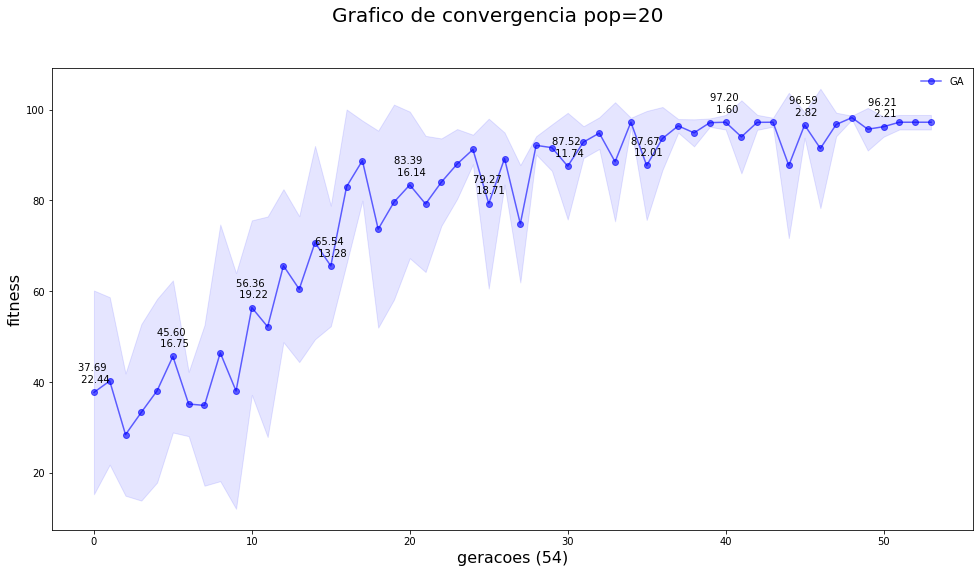

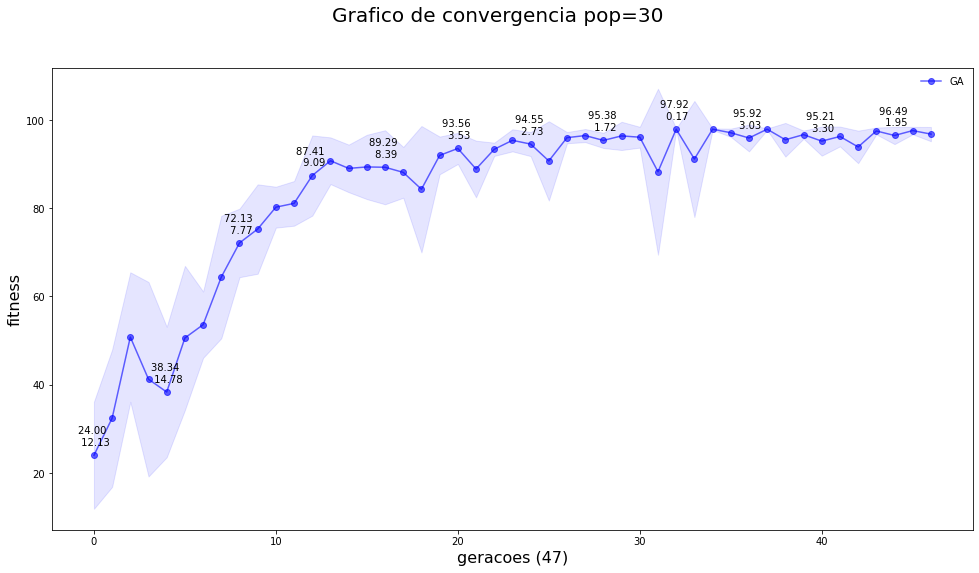

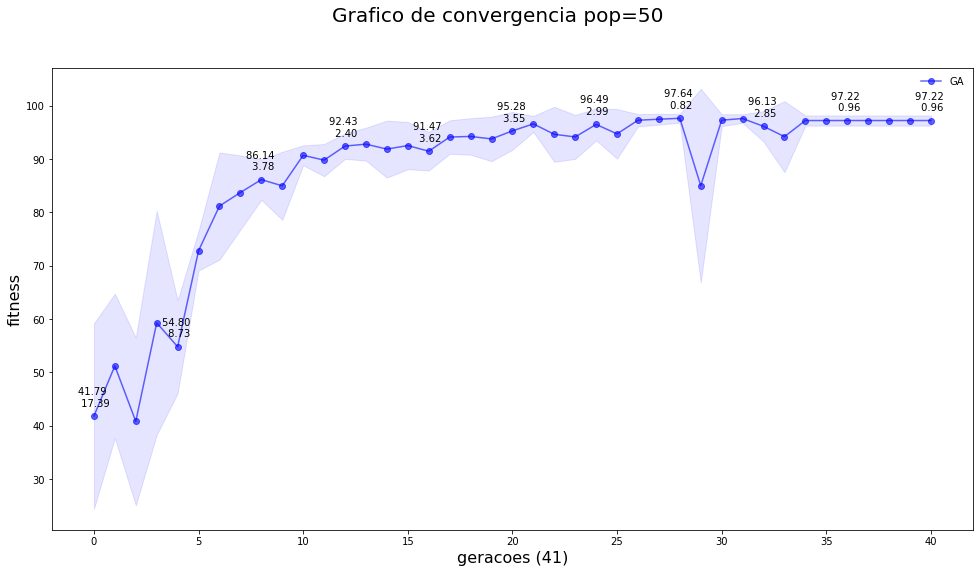

In [ ]:
plotResultadoFinal(resultado_final_caso)

## Tabela Final com o Fitness encontrado para cada população (20,30,50)

Percebe-se que a medida que o numero de individuos aumenta, tanto o fitness quanto o desvio padrão melhoram.

In [ ]:
printTabela(tabela_final_caso)

    fitness_media  fitness_stdev  X1_media  X1_stdev  X2_media  X2_stdev  \
20      97.199762       1.600476 -2.271004  1.494730  1.437841  1.999147   
30      96.805958       1.617824 -2.472104  1.153655  2.641315  1.371449   
50      97.220371       0.955390 -0.120044  2.238377 -0.883400  1.650930   

    X3_media  X3_stdev  X4_media  X4_stdev  ...  X52_media  X52_stdev  \
20 -0.933814  1.493415  0.368122  3.521563  ...  -0.241313   2.175103   
30  1.442846  1.805131  0.672407  1.404973  ...  -1.856126   2.390261   
50  0.782033  3.542432  0.541634  1.270975  ...   0.367453   1.496194   

    X53_media  X53_stdev  X54_media  X54_stdev  X55_media  X55_stdev  \
20  -0.985319   1.703656  -2.476487   1.900305   1.027707   1.056270   
30   0.766646   2.137308   0.895461   1.971617   0.879700   2.249687   
50  -1.761912   2.649514  -0.737951   1.695378   0.667693   2.720569   

    X56_media  X56_stdev  
20  -0.769105   1.250840  
30  -0.083501   2.409446  
50   0.657700   0.865986  

[3 r

# Teste comparacao do modelo Final encontrado pelo AG com um modelo treinado normalmente

O modelo final gerado pelo AG demonstra ser competitivo com uma Rede Neural treinada nas mesmas condiçoes (nº de camadas e pesos iguais).

In [ ]:
tabAcc(acc_final)

    NN_AG_final_media  NN_AG_final_stdev  NN_AG_media  NN_AG_stdev  \
20           0.979612           0.006967     0.972330     0.024781   
30           0.987864           0.005318     0.983495     0.008738   
50           0.978641           0.009388     0.970874     0.011176   

    NN_treinada_media  NN_treinada_stdev  
20           0.990291           0.002171  
30           0.988350           0.001816  
50           0.986893           0.002913  


# Variacao das probabilidades

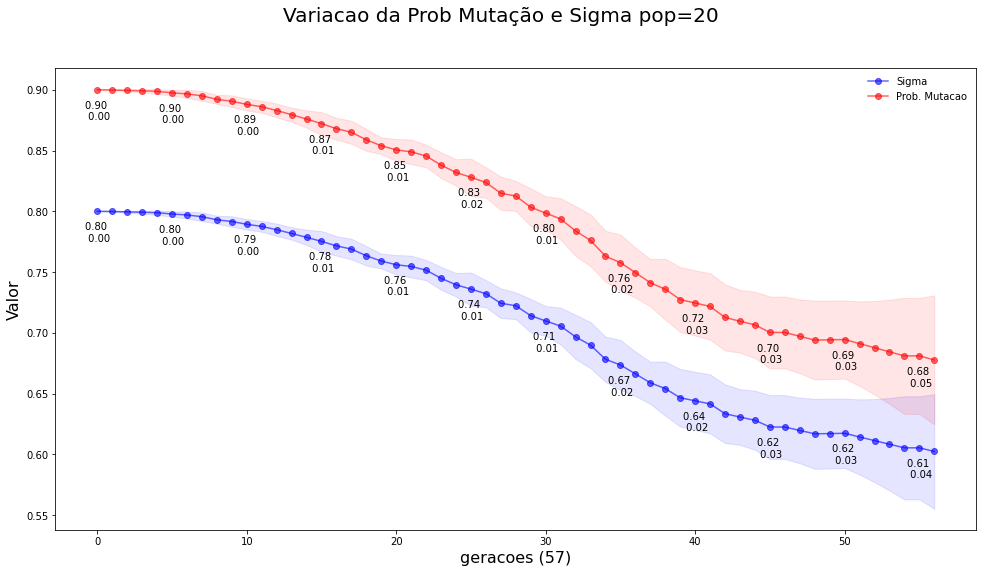

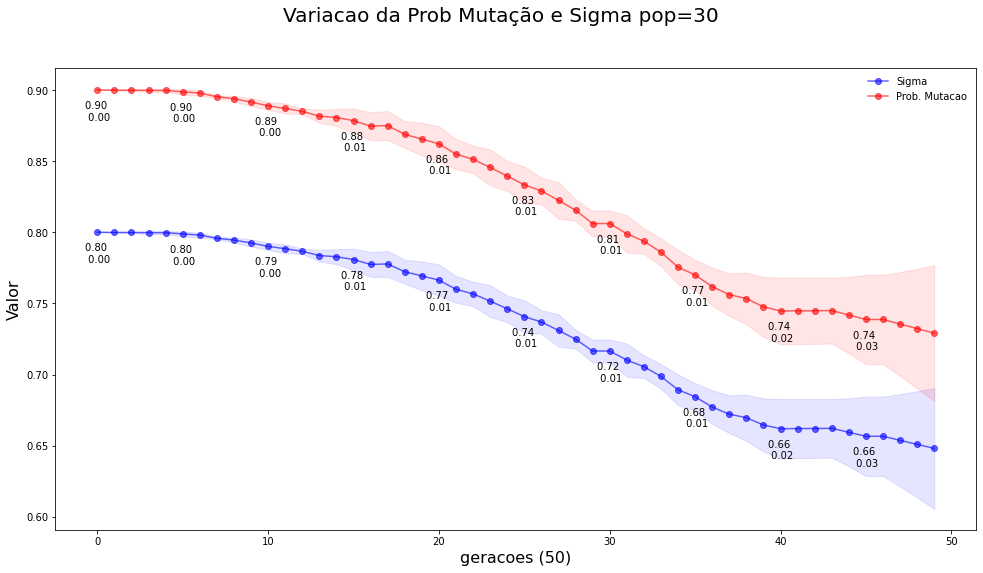

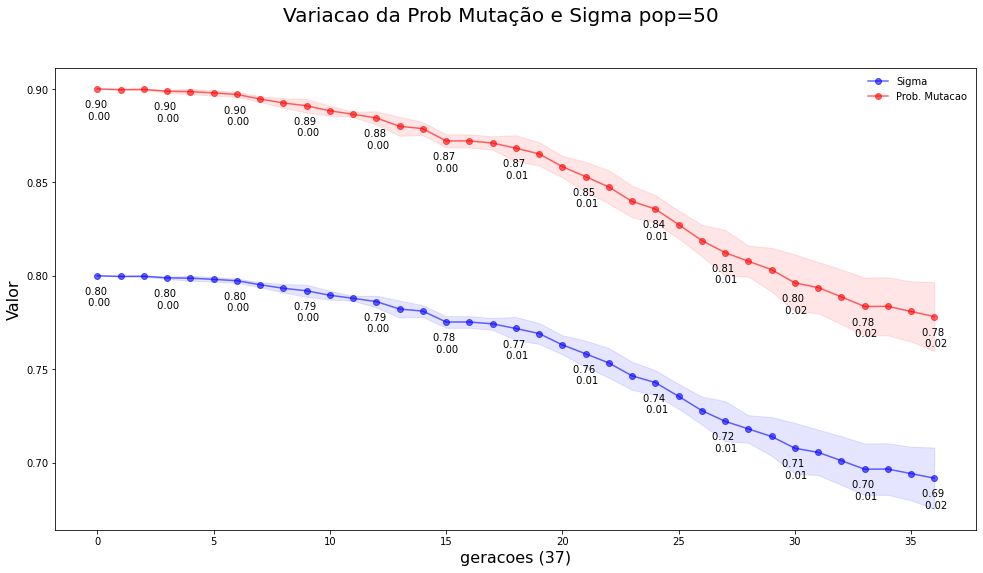

In [ ]:
def print_prob(prob_final):
  indi = {0:'20',1:'30',2:'50'}
  for c_pop,pop in enumerate(prob_final):
    maior = 0
    list_mut = []
    list_sigma = []

    for exec in pop:
      tmp_mut = [i[1] for i in exec]
      tmp_sigma = [i[0] for i in exec]

      if len(tmp_mut) > maior:
        maior = len(tmp_mut)
      
      list_mut.append(tmp_mut[:])
      list_sigma.append(tmp_sigma[:])
    
    for exec in range(len(pop)):
      a_mais = maior - len(list_mut[exec])

      for i in range(a_mais):
        valor = list_mut[exec][-1]
        list_mut[exec].append(valor)

        valor = list_sigma[exec][-1]
        list_sigma[exec].append(valor)

    fig, ax = plt.subplots()
    fig.set_size_inches(16.5, 8.5)

    
    dici_mut = {'mutation':[],'minimo':[],'maximo':[],'D.Padrao':[]}
    dici_sigma = {'sigma':[],'minimo':[],'maximo':[],'D.Padrao':[]}
    x =[]

    for gen in range(maior):
      x.append(gen)
      lista = [i[gen] for i in list_sigma]
      #lista = [i[-1] for i in lista]

      dici_sigma['sigma'].append(np.mean(lista))
      dici_sigma['minimo'].append(np.mean(lista)-np.std(lista))
      dici_sigma['maximo'].append(np.mean(lista)+np.std(lista))
      dici_sigma['D.Padrao'].append(np.std(lista))

      lista = [i[gen] for i in list_mut]
      #lista = [i[-1] for i in lista]

      dici_mut['mutation'].append(np.mean(lista))
      dici_mut['minimo'].append(np.mean(lista)-np.std(lista))
      dici_mut['maximo'].append(np.mean(lista)+np.std(lista))
      dici_mut['D.Padrao'].append(np.std(lista))

    
    ax.plot(x,dici_sigma['sigma'],'bo-',label='Sigma',alpha=.6)
    ax.fill_between(x, dici_sigma['minimo'], dici_sigma['maximo'], color='b', alpha=.1)
    text_distance = (0,10)

    ax.plot(x,dici_mut['mutation'],'ro-',label='Prob. Mutacao',alpha=.6)
    ax.fill_between(x, dici_mut['minimo'], dici_mut['maximo'], color='r', alpha=.1)
    text_distance = (0,-30)
    
    fig.suptitle('Variacao da Prob Mutação e Sigma pop='+str(indi[c_pop]), fontsize=20)
    plt.xlabel('geracoes ('+str(maior)+')', fontsize=16)
    plt.ylabel('Valor', fontsize=16)

    count = 0
    mod = int(maior*0.1)
    for X,Y in zip(x,dici_sigma['sigma']):

      label = "{:.2f} \n {:.2f}".format(Y,dici_sigma['D.Padrao'][count])
      

      if count % mod == 0:

        plt.annotate(label, # this is the text
                      (X,Y), # these are the coordinates to position the label
                      textcoords="offset points", # how to position the text
                      xytext=text_distance, # distance from text to points (x,y)
                      ha='center') # horizontal alignment can be left, right or center
      count += 1
    count = 0
    for X,Y in zip(x,dici_mut['mutation']):

      label = "{:.2f} \n {:.2f}".format(Y,dici_mut['D.Padrao'][count])
      

      if count % mod == 0:

        plt.annotate(label, # this is the text
                      (X,Y), # these are the coordinates to position the label
                      textcoords="offset points", # how to position the text
                      xytext=text_distance, # distance from text to points (x,y)
                      ha='center') # horizontal alignment can be left, right or center
      count += 1
    ax.legend(loc='upper right', frameon=False)
    plt.show()

print_prob(prob_final)  

# Teste com o AtutoKeras

Como pode ser observado, o autoKeras conseguiu encontrar um modelo ótimo para o problema do dataset. Isso já era esperado dado a simplicidade do dataset. Mas é interessante observar que o AG proposto conseguiu encontrar um modelo com desempenho quase ótimo, porém com uma Rede Neural muito mais simples. 

In [ ]:
from autokeras import StructuredDataClassifier

# define the search
search = StructuredDataClassifier(max_trials=8)
# perform the search
search.fit(x=X_train, y=y_train,epochs=10, verbose=0)
# evaluate the model
loss, acc = search.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)

# get the best performing model
model = search.export_model()
# summarize the loaded model
model.summary()

Epoch 1/10
30/30 [==============================] - 1s 4ms/step - loss: 0.5955 - accuracy: 0.7021
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4697 - accuracy: 0.8615
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3428 - accuracy: 0.9187
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.2236 - accuracy: 0.9521
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1374 - accuracy: 0.9740
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0893 - accuracy: 0.9802
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0641 - accuracy: 0.9823
Epoch 8/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0494 - accuracy: 0.9844
Epoch 9/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9844
Epoch 10/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9885
Accuracy: 0.988
Mod

In [ ]:
print('Parâmetros da Rede Neural utilizada pelo AG')
weights = GNN(l1=l1,l2=l2,l3=l3).returnWeights()
weights = deconvertPesos(ga.best.decodeInd(),weights)
gnn = GNN(child_weights=weights,l1=l1,l2=l2,l3=l3)
gnn.summary()

Parâmetros da Rede Neural utilizada pelo AG
Model: "gnn_40277"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120831 (Dense)         (None, 4)                 20        
_________________________________________________________________
dense_120832 (Dense)         (None, 8)                 40        
_________________________________________________________________
dense_120833 (Dense)         (None, 1)                 9         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


# Considerações Finais

O dempenho do modelo de Rede Neural encontrado pelo AG com TRI demonstra ser competitivo quando comparado com uma NN treinada normalmente e com um modelo gerado pelo AutoKeras. Porém, vale ressaltar que o dataset utilizado como validação da metodologia é simples, seria interessante testar com um conjunto de dados de maior complexidade para entender quais as limitacoes dessa proposta.

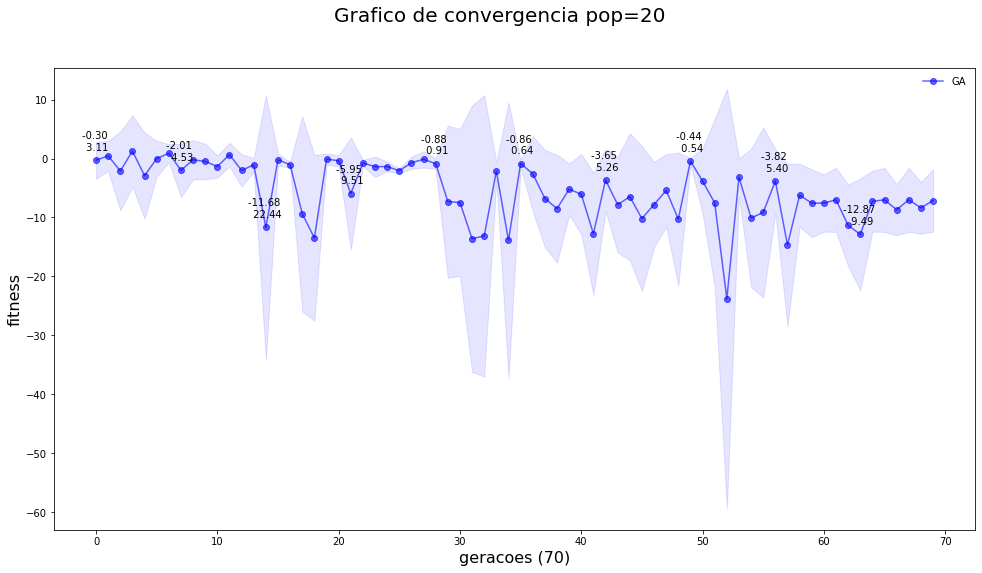

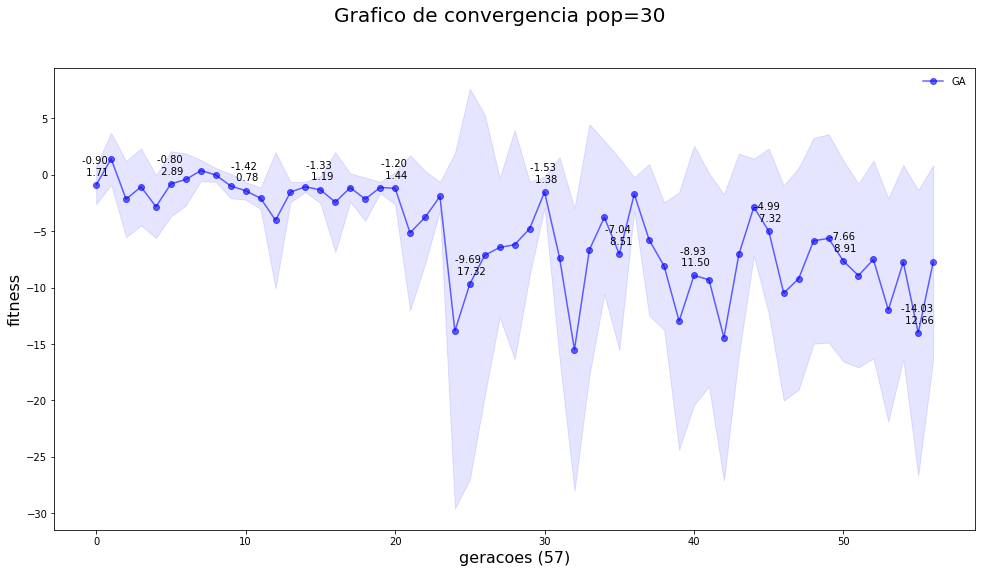

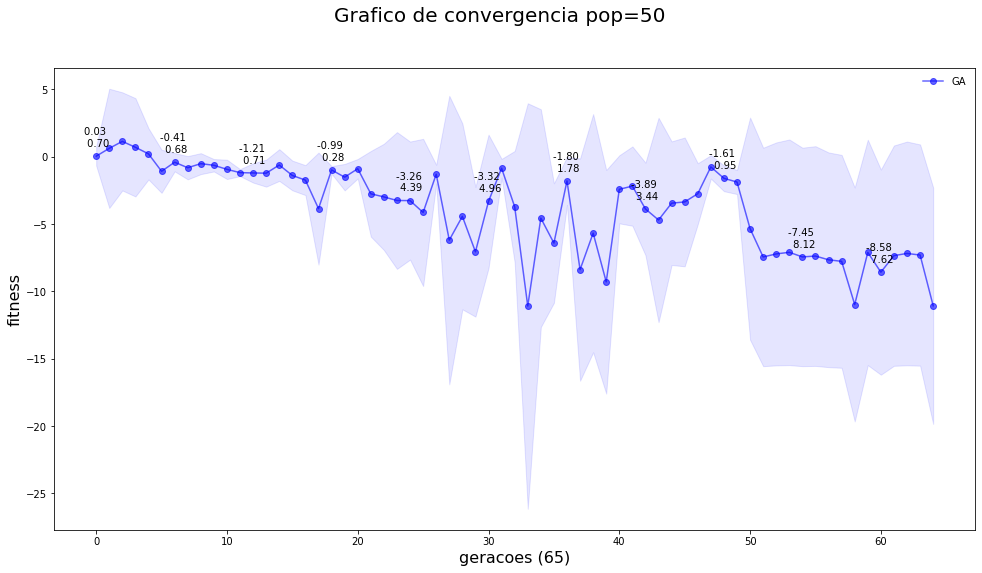

In [ ]:
plotResultadoFinal(irt_final)

In [ ]:
tmp_irtHist = ga.irtHist[:]

dif_hist = []
pos_hist = []
for aux_tmp in tmp_irtHist:
    dif_values = [i[1] for i in aux_tmp]
    dif_hist.append([np.mean(dif_values), np.std(dif_values)])
    pos_values = [i[1] for i in aux_tmp if i[1] >= 0]
    pos_hist.append(len(pos_values))

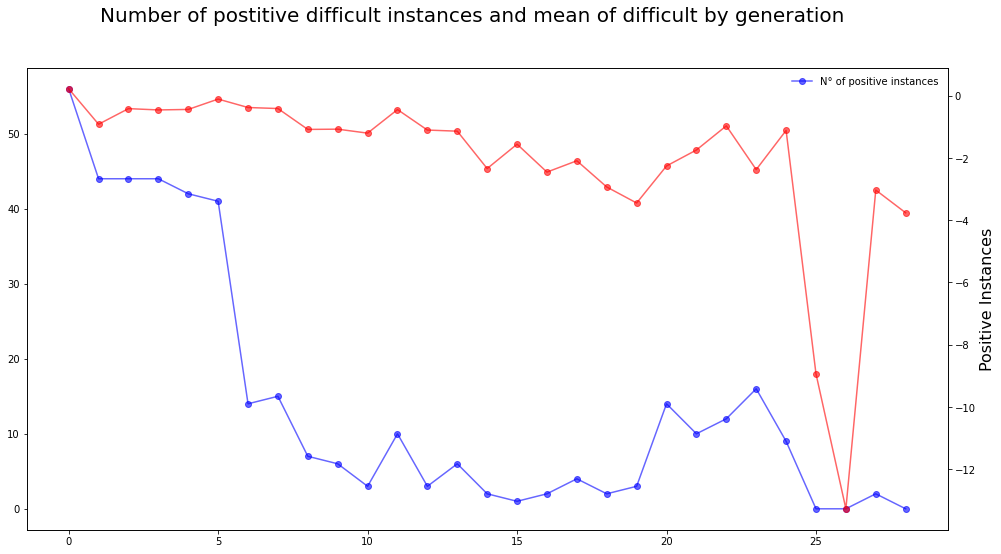

In [ ]:
x = [i for i in range(len(pos_hist))]

fig, ax = plt.subplots()
fig.set_size_inches(16.5, 8.5)

ax.plot(x,pos_hist,'bo-',label='N° of positive instances',alpha=.6)

y = [i[0] for i in dif_hist]

ax2 = ax.twinx() 

ax2.plot(x,y,'ro-',label='Difficult mean',alpha=.6)

fig.suptitle('Number of postitive difficult instances and mean of difficult by generation', fontsize=20)
plt.xlabel('Generations',fontsize=16)
plt.ylabel('Positive Instances', fontsize=16)
ax.legend(loc='upper right', frameon=False)
plt.show()